<a href="https://colab.research.google.com/github/JoDeMiro/LuaLisa/blob/main/Lua_Lisa_Neural_Net_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Próba

Egy olyan neurális hálót rakok össze aminek két bemenet van és több kimenete.

Ezek alapján akarom majd megcsinálni a körököet helyükre, méretükre, színre, z-indexre poziciónáló neurális hálót, ahol a megfelelő megoldáshoz a neurális háló súlyait keressük, az illeszkedés mértékét pedig egy meghatározott függvény segítségével állítjuk elő. Az optimalizáció alapja nem Gradiens Descent módszer lesz hanem Evolution Selection.

A bemenet lehet bármi (x,y) változó, lehet származtatva egy képből, (x,y,v) vagy lehet csak (x,y) ahol x és y vektorok (0, .., height), (0, .., widht).

A lényeg, hogy képet azért kell beolvasnunk, hogy illeszteni tudjuk valamihez a köröket és ez alapján mértni tudjuk a hibát.

In [1]:
import os
import sys
import time
import math 
import keras
import pickle
import pprint
import random
import sklearn
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

import numpy as np

import skimage.io
import skimage.transform

from copy import deepcopy

from skimage.draw import ellipse
from IPython.display import clear_output

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.neural_network import MLPRegressor

from keras.models import Sequential
from keras.layers import Dense, Activation

from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

print('Python version:{}'.format(sys.version))
print('Numpy version:{}'.format(np.__version__))
print('Pandas version:{}'.format(pd.__version__))
print('Keras version:{}'.format(keras.__version__))
print('Tensorflow version:{}'.format(tf.__version__))
print('Sci-Kit Learn version:{}'.format(sklearn.__version__)) 

Python version:3.7.13 (default, Apr 24 2022, 01:04:09) 
[GCC 7.5.0]
Numpy version:1.21.6
Pandas version:1.3.5
Keras version:2.8.0
Tensorflow version:2.8.2
Sci-Kit Learn version:1.0.2


In [2]:
#

# Próba több kimenetű neurális hálóra Scikit-learn-ben

rows = 10
cols = 4

x = np.array(list(np.arange(0,rows))*cols)                                             # <-- solution 1
print(x)

_x = np.arange(rows)                                                                   # <-- solution 2
x = np.hstack((_x, ) * cols)
print(x)

y = np.repeat(np.arange(cols),rows)
print(y)

# függőlegesen haladunk végig: elöször első oszlop első sor, második sor, etc.

# fenti megoldás egy 10 sor 4 oszlop képhez tartozik


[0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6
 7 8 9]
[0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6
 7 8 9]
[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3
 3 3 3]


In [3]:
# az ebből képzett input vektor

_input = np.vstack((x,y)).T
print(_input)
print(_input.shape)

[[0 0]
 [1 0]
 [2 0]
 [3 0]
 [4 0]
 [5 0]
 [6 0]
 [7 0]
 [8 0]
 [9 0]
 [0 1]
 [1 1]
 [2 1]
 [3 1]
 [4 1]
 [5 1]
 [6 1]
 [7 1]
 [8 1]
 [9 1]
 [0 2]
 [1 2]
 [2 2]
 [3 2]
 [4 2]
 [5 2]
 [6 2]
 [7 2]
 [8 2]
 [9 2]
 [0 3]
 [1 3]
 [2 3]
 [3 3]
 [4 3]
 [5 3]
 [6 3]
 [7 3]
 [8 3]
 [9 3]]
(40, 2)


In [4]:
# ha ezekhez szeretnék csinálni egy output vector, (már csak azért, hogy inicializálni tudjam a Scikit MLPRegressort)

_variables = 5

_output = np.zeros(shape=(_input.shape[0], _variables))

print(_output.shape)

(40, 5)


In [5]:
# ha viszont nem nulla körüli véletlen eloszlást akarok generálni, hanem valamilyen intervallum közé eső számokat akkor.

_var_1_max = 100
_var_2_max = 10
_var_3_max = 255
_var_4_max = 800
_var_5_max = 400

_var_1 = np.linspace(start = 0, stop = _var_1_max, num = _input.shape[0])
_var_2 = np.linspace(start = 0, stop = _var_2_max, num = _input.shape[0])
_var_3 = np.linspace(start = 0, stop = _var_3_max, num = _input.shape[0])
_var_4 = np.linspace(start = 0, stop = _var_4_max, num = _input.shape[0])
_var_5 = np.linspace(start = 0, stop = _var_5_max, num = _input.shape[0])

_output = np.vstack((_var_1, _var_2, _var_3, _var_4, _var_5)).T

output_scaler = MinMaxScaler(feature_range = (-1, 1))

_output = output_scaler.fit_transform(_output)

In [6]:
# most csinálom meg a neurális háló

random_state = 41

mlp = MLPRegressor(hidden_layer_sizes=(10, 15),
                   activation="relu",
                   solver="sgd",
                   batch_size="auto",
                   learning_rate_init=0.0000001,
                   random_state=random_state,
                   max_iter=1,
                   shuffle=False,
                   warm_start=False,
                   validation_fraction=0.0)

mlp.fit(_input, _output)

# illeszteni nem kell mivel rohadtul nem vagyunk kíváncsiak arra, hogy mit illesztett, itt csak inicializálni akartuk a súlyokat

# viszont a predictre szükségem van, hogy annak alapján elő tudjam állítani a köröket, amelyek alapján azután ténylegesnen megmérem az illeszkedést

predicted = mlp.predict(_input)

print(predicted.shape)

print(predicted)

(40, 5)
[[-0.74218515  0.4354606   0.39399316  0.77973369  0.48993188]
 [-0.54051187  0.25385712  0.26433244  0.89982319  0.62550309]
 [-0.57703106  0.11673117  0.15632178  1.09678953  0.66033642]
 [-0.56406134 -0.00940247 -0.01752001  1.3746783   0.78105468]
 [-0.54120897 -0.06937488 -0.14802983  1.62859868  0.88041098]
 [-0.52129687 -0.12972088 -0.27833476  1.8831758   0.97659216]
 [-0.51020697 -0.19118783 -0.40802488  2.13972349  1.06324649]
 [-0.49911708 -0.25265479 -0.537715    2.39627119  1.14990081]
 [-0.48802719 -0.31412175 -0.66740511  2.65281888  1.23655514]
 [-0.47693729 -0.37558871 -0.79709523  2.90936657  1.32320947]
 [-0.68629871  0.27516265  0.21595872  0.9386559   0.6423022 ]
 [-0.75840837  0.19854405  0.15154093  1.05581639  0.62545615]
 [-0.87676734  0.20640195  0.19108114  1.27642213  0.60309161]
 [-0.93455774  0.18102135  0.13082254  1.52927561  0.64565615]
 [-0.95404714  0.14210885  0.01799879  1.81525222  0.73214573]
 [-0.96095376  0.10261233 -0.09329157  2.094001

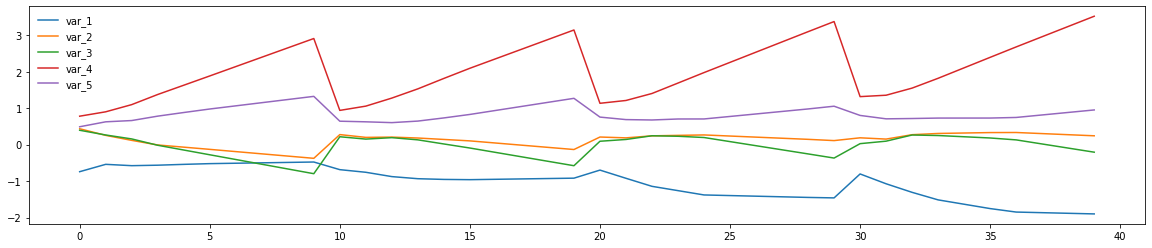

In [7]:
# Érdekesség képpen vizualizáljuk már hogy milyen leképezést csinált

plt.figure(figsize=(20, 4))
plt.plot(predicted[:,0], label='var_1')
plt.plot(predicted[:,1], label='var_2')
plt.plot(predicted[:,2], label='var_3')
plt.plot(predicted[:,3], label='var_4')
plt.plot(predicted[:,4], label='var_5')
plt.legend(frameon=False)
plt.show()

10
4


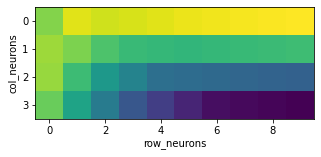

In [15]:
# Ezt most megpróbálom ábrázolni a két bemeneti változó relációjában (2D)

print(rows)
print(cols)

_pred_1_2D = np.reshape(predicted[:,0], (rows, cols))
_pred_1_2D = np.reshape(predicted[:,0], (cols, rows))

plt.figure(figsize=(5, 5))
plt.imshow(_pred_1_2D)
plt.xlabel('row_neurons')
plt.ylabel('col_neurons')
plt.show()

rows = 10
cols = 4


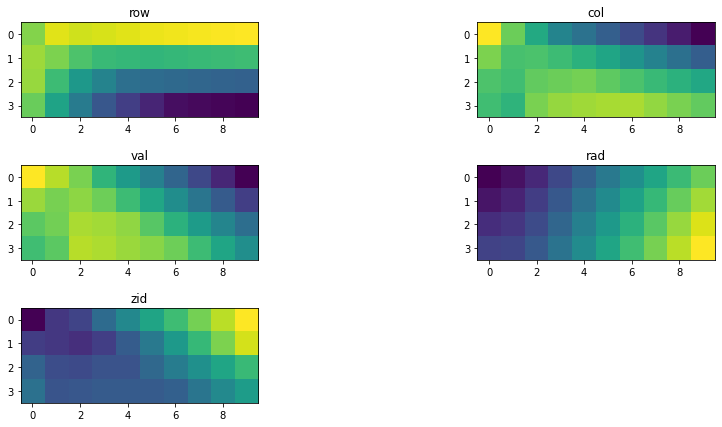

In [10]:
# Ezt most megpróbálom ábrázolni a két bemeneti változó relációjában (2D)

print('rows =', rows)
print('cols =', cols)

title = ['row', 'col', 'val', 'rad', 'zid']

plt.figure(figsize=(15, 7))
plt.subplots_adjust(hspace=0.5)

for i in range(5):
    # add a new subplot iteratively
    ax = plt.subplot(3, 2, i + 1)

    _pred_2D = np.reshape(predicted[:,i], (cols, rows))

    ax.imshow(_pred_2D)

    ax.set_title(title[i])
    ax.set_xlabel("")

In [11]:
# Vissza transzformálom az eredetibe a becsült adatokat és le is kerekítem őket
# Mivel alapvetően mindegyik integer ezért át is alakítom őket int8-ba

predicted_float = output_scaler.inverse_transform(predicted)

print(type(predicted_float))
print(predicted_float.dtype)
predicted_int = predicted_float.astype('int16')

print(predicted_int)

<class 'numpy.ndarray'>
float64
[[  12    7  177  711  297]
 [  22    6  161  759  325]
 [  21    5  147  838  332]
 [  21    4  125  949  356]
 [  22    4  108 1051  376]
 [  23    4   92 1153  395]
 [  24    4   75 1255  412]
 [  25    3   58 1358  429]
 [  25    3   42 1461  447]
 [  26    3   25 1563  464]
 [  15    6  155  775  328]
 [  12    5  146  822  325]
 [   6    6  151  910  320]
 [   3    5  144 1011  329]
 [   2    5  129 1126  346]
 [   1    5  115 1237  365]
 [   2    5  100 1342  387]
 [   2    4   84 1447  409]
 [   3    4   69 1552  431]
 [   4    4   53 1657  453]
 [  15    6  139  853  350]
 [   3    5  145  884  337]
 [  -7    6  158  960  335]
 [ -13    6  156 1075  340]
 [ -18    6  152 1190  340]
 [ -19    6  138 1302  354]
 [ -20    6  123 1414  368]
 [ -21    5  109 1526  381]
 [ -22    5   95 1638  395]
 [ -23    5   80 1749  410]
 [   9    5  130  926  360]
 [  -3    5  139  941  341]
 [ -15    6  161 1020  343]
 [ -25    6  159 1127  345]
 [ -31    6  155

Oké, tehát sikerült igazolnom, hogy lehet több kiemenelű neurális hálót csinálnom Scikit learnben.

1. Tegyük még bele a neurális háló vizualizert

Csak azért mert utána meg fogok változtani egy darab súlyt és szeretném nyomonkövetni a változását.

2. A neruális háló kimenete alapján elő kell állítanom egy képet. A hálló kimeneteli a kör egyes paramétereit jelenti (x, y, radius, z-index, color)

Ezekre kell csinálnom egy egy függvényt, vagy osztályt (például a kör osztály).
Ami kap egy neurális háló kimenetet és előállít belőle egy képet.

Vagy legyen egy image osztály, aminek van egy draw metodusa.

## Visualise net - Best Solution

[ 2 10 15  5]


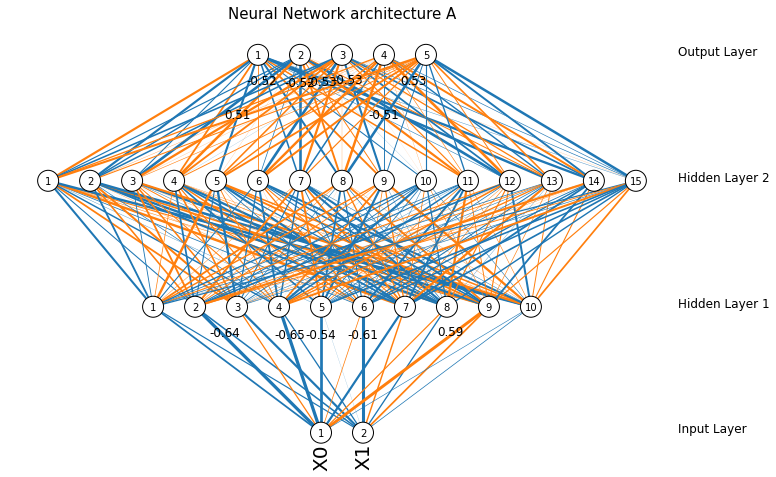

In [18]:
import os

os.system('rm MLPPlot.py')
os.system('wget https://raw.githubusercontent.com/JoDeMiro/Micado-Research/main/MLPPlot.py')

import MLPPlot

net = mlp                                                                           # <- a kiinduló megoldást vesszük sorra

num_input_varialbe = ['X']

num_input_varialbe = ['X'+str(i) for i in range(30)]

num_input_varialbe = ['X'+str(i) for i in range(net.coefs_[0].shape[0])]            # <- mlp.coefs_[0].shape[0] a bemenetek száma


# Define the structure of the network
# network_structure = np.hstack(([len(num_input_varialbe)], np.asarray(net.hidden_layer_sizes), [1]))
# network_structure = np.hstack(([len(num_input_varialbe)], np.asarray(net.hidden_layer_sizes), [5]))
network_structure = np.hstack(([len(num_input_varialbe)], np.asarray(net.hidden_layer_sizes), [_output.shape[1]]))

print(network_structure)

# Draw the Neural Network with weights
network = MLPPlot.DrawNN(network_structure, net.coefs_, num_input_varialbe)
network.draw()

## Image

<class 'numpy.ndarray'>
(444, 788, 3)
red   min 6 and max 255
green min 0 and max 255
blue  min 0 and max 255
uint8
uint8
(440, 784)


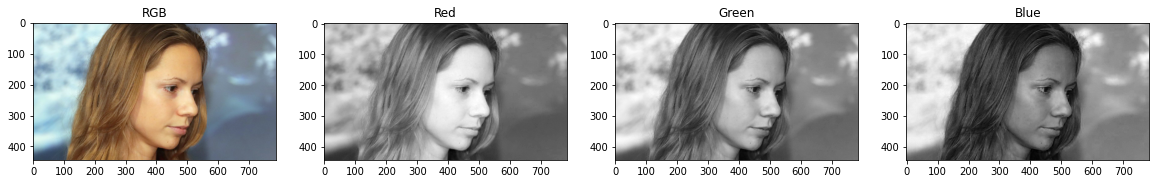

In [19]:
pic1 = skimage.io.imread('https://github.com/JoDeMiro/Data/raw/main/Images/woman3.png')

print(type(pic1))
print(pic1.shape)

red1   = pic1[:-4, :-4, 0]
green1 = pic1[:-4, :-4, 1]
blue1  = pic1[:-4, :-4, 2]

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20, 8))

ax1.imshow(pic1, cmap='gray'); ax1.set_title('RGB')
ax2.imshow(red1, cmap='gray'); ax2.set_title('Red')
ax3.imshow(green1, cmap='gray'); ax3.set_title('Green')
ax4.imshow(blue1, cmap='gray'); ax4.set_title('Blue')

print('red   min {} and max {}'.format(red1.min(), red1.max()))
print('green min {} and max {}'.format(green1.min(), green1.max()))
print('blue  min {} and max {}'.format(blue1.min(), blue1.max()))

print(pic1.dtype)
print(red1.dtype)
print(red1.shape)

plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  if __name__ == '__main__':


min 0 and max 255 and shape (440, 784)
gray.dtype = uint8


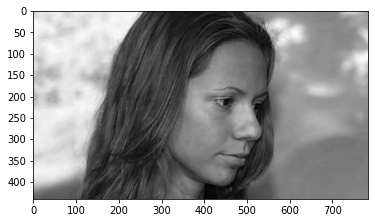

In [20]:
r = red1.astype('float64')
g = green1.astype('float64')
b = blue1.astype('float64')

gray = (r + g + b).astype('float64')

gray = gray/3.0

gray = skimage.color.rgb2gray(blue1)

print('min {} and max {} and shape {}'.format(gray.min(), gray.max(), gray.shape))
print('gray.dtype =', gray.dtype)
plt.imshow(gray, cmap='gray', vmin=0, vmax=255)
plt.show()

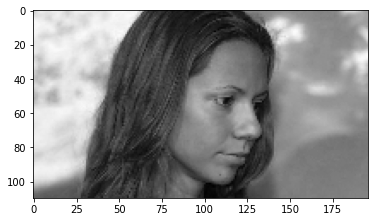

min 0.49999999999994316 and max 251.0000000000001 and shape (110, 196)
gray.dtype float64


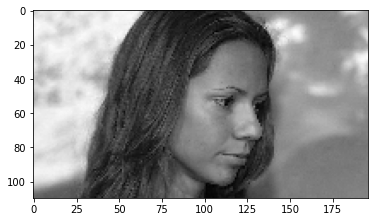

min 0 and max 255 and shape (110, 196)
gray.dtype uint8


In [21]:

# Ezzel az eljárással az a baj, hogy az np.uint8 -> np.ufloat64 típusra változik
gray_float64 = skimage.transform.rescale(gray, 0.25, anti_aliasing=False, preserve_range=True)

plt.imshow(gray_float64, cmap='gray', vmin=0, vmax=255)
plt.show()

print('min {} and max {} and shape {}'.format(gray_float64.min(), gray_float64.max(), gray_float64.shape))
print('gray.dtype', gray_float64.dtype)

# Ez az eljárás viszont megörzi az np eredeti dtype típusát, ezért ezt használom
gray_uint8 = gray[::4, ::4]

plt.imshow(gray_uint8, cmap='gray', vmin=0, vmax=255)
plt.show()

print('min {} and max {} and shape {}'.format(gray_uint8.min(), gray_uint8.max(), gray_uint8.shape))
print('gray.dtype', gray_uint8.dtype)

## Randomizer

In [22]:
class Randomizer():

  def __init__(self, _seed):
    self.seed = _seed
    self.prng = np.random.RandomState(1234567890)
    self.debug = False
    self.counter = 0
    self.mlp = None
    self.factor_intercept = 1000
    self.factor_coef = 1000
    pass

  def set_factors(self, factor_intercept, factor_coef) -> None:
    'Set self.factor_intercept and self.factor_coef'
    self.factor_intercept = factor_intercept
    self.factor_coef = factor_coef

  def randomize_intercepts(self, intercepts) -> list:
    'Get an MLPRegresson, takes its .intercepts_ and randomize'
    _factor = self.factor_intercept
    _intercepts = deepcopy(intercepts)
    for i in range(len(intercepts)):

      modifier = (self.prng.randn(intercepts[i].shape[0]) / _factor)
      
      _intercepts[i] = intercepts[i] + modifier                                     # <-- add new random values to the intercepts (all at once)
      # _intercepts[i] = intercepts[i]                                              # <-- ha nem akarom módosítani akkor legyen egyszerűen ez

    return _intercepts

  def randomize_coefs(self, coefs) -> list:
    'Get an MLPRegressor, takes its .coefs_ and randomize'
    _factor = self.factor_coef
    _coefs = deepcopy(coefs)
    for i in range(len(coefs)):

      modifier = (self.prng.randn(coefs[i].shape[0], coefs[i].shape[1]) / _factor)  # <-- create new random values N(0,1)/factor

      _coefs[i] = coefs[i] + modifier                                               # <-- add new random values to the weights (all at once)
      # _coefs[i] = coefs[i]                                                        # <-- ha nem akarom módosítani akkor legyen egyszerűen ez

    return _coefs

  
  def randomize_mlp(self, mlp, factor_intercept = 1000, factor_coef = 1000) -> MLPRegressor:
    'Get an MLPRegression and randomize it'

    new_mlp = deepcopy(mlp)

    new_mlp.intercepts_ = self.randomize_intercepts(new_mlp.intercepts_)
    new_mlp.coefs_      = self.randomize_coefs(new_mlp.coefs_)

    return new_mlp



## Evolution

In [41]:
class Evolution():

  def __init__(self, original_image):
    print('Evolutiion init')

    self.original_image = original_image
    self.height = self.original_image.shape[0]
    self.width  = self.original_image.shape[1]
    self.average = np.mean(self.original_image)

    plt.imshow(self.original_image)
    plt.show()
    print(self.original_image.min())
    print(self.original_image.max())
    print(self.original_image.mean())
    print(self.original_image.shape)

    self.randomizer = Randomizer(1)

    self.best_error = 999999999999.0
    self.best_error_history = []
    self.error_history = []
    self.since = 0
    self.save_image = False

    print('self.height =', self.height)
    print('self.width  =', self.width)

    self.best_mlp = None
    pass

  def show_history(self) -> None:
    'Plot the history of the error according to the generation'
    plt.figure()
    plt.plot(self.error_history)
    plt.plot(self.best_error_history)
    plt.show()

  def load_archived_model(self) -> None:
    'Load the saved model from file and reset the initial error'
    cmd = 'wget https://github.com/JoDeMiro/LuaLisa/raw/main/best_solution.pkl'
    os.system(cmd)
    with open('best_solution.pkl', 'rb') as f:
      loaded_best_solution = pickle.load(f)
      self.best_solution = loaded_best_solution
      self.best_error = 999999999999.0                                              # <-- le kell resetelni a best_error értékét

  def setup(self, row_neurons, col_neurons, debug=False) -> None:                   # <-- ez alapján áll elő a bemenet
    'Based on the given parameters setup and creates the input of the MLP'

    self.row_neurons = row_neurons
    self.col_neurons = col_neurons
    x = np.array(list(np.arange(0,row_neurons))*col_neurons)
    print(x)
    y = np.repeat(np.arange(col_neurons),row_neurons)
    print(y)
    self.input = np.vstack((x,y)).T                                                 # <-- az ebből képzett input vektor
    if debug == True: print(self.input)
    print('self.input.shape =', self.input.shape)
    self.input_scaler = MinMaxScaler(feature_range=(-1, 1))
    self.input_normalized = self.input_scaler.fit_transform(self.input)

  def setup_output(self, val_max = 255, rad_max = 50) -> None:
    'Based on the given image setup and cofigure the output of the MLP'

    _row_max = self.height                                                          # <-- ez a kép magasságából jön (sorok száma)
    _col_max = self.width                                                           # <-- ez a kép méretéből a széllességéből (oszlopok száma jön)
    _val_max = val_max                                                                  # <-- fix
    _rad_max = rad_max
    _zid_max = self.input.shape[0]                                                  # <-- ez a körök számával lesz egyenlő ami az input hossza

    _var_1_row = np.linspace(start = 0, stop = _row_max, num = self.input.shape[0])
    _var_2_col = np.linspace(start = 0, stop = _col_max, num = self.input.shape[0])
    _var_3_val = np.linspace(start = 0, stop = _val_max, num = self.input.shape[0])
    _var_4_rad = np.linspace(start = 0, stop = _rad_max, num = self.input.shape[0])
    _var_5_zid = np.linspace(start = 0, stop = _zid_max, num = self.input.shape[0])

    _output = np.vstack((_var_1_row, _var_2_col, _var_3_val, _var_4_rad, _var_5_zid)).T

    self.output_scaler = MinMaxScaler(feature_range = (-1, 1))
    self.output_normalized = self.output_scaler.fit_transform(_output)


  def initilize_mlp(self, first_layer_nn, second_layer_nn, activation) -> None:
    random_sate = 41                                                                # <-- fix the random state
    self.mlp = MLPRegressor(hidden_layer_sizes=(first_layer_nn, second_layer_nn),
                            activation=activation,                                      # <-- 'relu', 'tanh'
                            solver='sgd',
                            batch_size='auto',
                            learning_rate_init=0.0000000001,                        # <-- we do not want to learn at all
                            max_iter=1,                                             # <-- we do not want to learn at all
                            shuffle=False,
                            random_state=random_state,                              # <-- make the reult repeatable
                            warm_start=False,
                            validation_fraction=0.0)


  def init(self, debug=False) -> None:
    self.mlp.fit(self.input_normalized, self.output_normalized)                     # <-- bug fix: self.input -> self.input_normalized
    self.predicted = self.mlp.predict(self.input_normalized)                        # <-- bug fix: self.input -> self.input_normlaized
    self.predicted_inverted = self.output_scaler.inverse_transform(self.predicted)
    self.predicted_int = self.predicted_inverted.astype('int16')
    if debug==True: print(self.predicted_int)
    self.best_mlp = self.mlp                                                        # <-- initialize the best_mlp
  
  def predict(self, mlp, debug=False) -> np.ndarray:
    predicted = mlp.predict(self.input_normalized)                                  # <-- bug fix: self.input -> self.input_normlaized
    predicted_inverted = self.output_scaler.inverse_transform(predicted)
    predicted_int = predicted_inverted.astype('int16')
    if debug==True: print(predicted_int)
    return predicted_int

  def nn_plot(self) -> None:
    'Visualize MLPRegressor'

    file_exists = os.path.exists('MLPPlot.py')

    if( file_exists == False ):
      os.system('wget https://raw.githubusercontent.com/JoDeMiro/Micado-Research/main/MLPPlot.py')

    import MLPPlot
    net = self.mlp                                                                      # <- a kiinduló megoldást vesszük sorra
    num_input_varialbe = ['X']
    num_input_varialbe = ['X'+str(i) for i in range(30)]
    num_input_varialbe = ['X'+str(i) for i in range(net.coefs_[0].shape[0])]            # <- mlp.coefs_[0].shape[0] a bemenetek száma

    print(self.mlp.coefs_[-1].shape)
    print(self.output_normalized.shape)

    # Define the structure of the network
    # network_structure = np.hstack(([len(num_input_varialbe)], np.asarray(net.hidden_layer_sizes), [5]))     # <-- [5] is hard coded
    network_structure = np.hstack(([len(num_input_varialbe)], np.asarray(net.hidden_layer_sizes), [net.coefs_[-1].shape[1]]))

    print(network_structure)

    # Draw the Neural Network with weights
    network = MLPPlot.DrawNN(network_structure, net.coefs_, num_input_varialbe)
    network.draw()

  def nn_visualizer(self) -> None:
    'The output of the NN is visualized as the function of the inputs in 2D'
    # Ezt most megpróbálom ábrázolni a két bemeneti változó relációjában (2D)

    print('self.row_neurons =', self.row_neurons)
    print('self.col_neurons =', self.col_neurons)

    predicted = self.mlp.predict(self.input_normalized)

    plt.figure(figsize=(15, 7))
    plt.subplots_adjust(hspace=0.5)

    for i in range(5):
        # add a new subplot iteratively
        ax = plt.subplot(3, 2, i + 1)

        _pred_2D = np.reshape(predicted[:,i], (self.col_neurons, self.row_neurons))

        ax.imshow(_pred_2D)

        ax.set_title(str(i))

# Most jön az, hogy be kell építenem azt, hogy a neurális háló kimenete (predicted_int)
# alapján csináljon egy képet a körökkel.

  def create_mlp_image(self):
    'Based on the prediction of the MLP create an image'

    created_img = np.zeros((self.height, self.width), dtype=np.float64)
    print(created_img.shape)

    # Ha ténylegesen figyelembe akarom venni a Z-order-t akkor sortolni kell
    # https://opensourceoptions.com/blog/sort-numpy-arrays-by-columns-or-rows
    # predicted_int_sorted_by_zid = self.predicted_int[self.predicted_int[:, -1].argsort()]     # <-- ascending
    predicted_int_sorted_by_zid = self.predicted_int[-self.predicted_int[:, -1].argsort()]      # <-- descending
    self.predicted_int = predicted_int_sorted_by_zid

    # Az mlp és annak több kimenetelű outputja alapján csináljuk meg a köröket
    for i in range(len(self.predicted_int)):
      circle_row = self.predicted_int[i,0]
      circle_col = self.predicted_int[i,1]
      circle_val = self.predicted_int[i,2]
      circle_rad = self.predicted_int[i,3]
      circle_zid = self.predicted_int[i,4]

      rr, cc = ellipse(r=circle_row, c=circle_col, r_radius=circle_rad, c_radius=circle_rad)

      # ha kilóg a képből akkor le kell vágni
      rr[rr >= self.height] = self.height-1                   # <-- a row a magasság
      cc[cc >= self.width] = self.width-1                     # <-- a col a szélesség
      rr[rr < 0] = 0
      cc[cc < 0] = 0

      created_img[rr, cc] = circle_val                              # <-- adjuk hozzá a kört a képhez a megfelelő pixel intenzitással [value]

    self.created_img = created_img

# Most jön az, hogy be kell építenem azt, hogy a neurális háló kimenete (predicted_int)
# alapján csináljon egy képet a körökkel.

  def create_and_get_mlp_image(self, predicted_int) -> np.ndarray:
    'Based on the prediction of the MLP create an image'

    # created_img = np.zeros((self.height, self.width), dtype=np.float64)
    created_img = np.full((self.height, self.width), self.average)
    print(created_img.shape)

    # Ha ténylegesen figyelembe akarom venni a Z-order-t akkor sortolni kell
    # https://opensourceoptions.com/blog/sort-numpy-arrays-by-columns-or-rows
    # predicted_int_sorted_by_zid = self.predicted_int[self.predicted_int[:, -1].argsort()]     # <-- ascending
    predicted_int_sorted_by_zid = predicted_int[-predicted_int[:, -1].argsort()]                # <-- descending
    predicted_int = predicted_int_sorted_by_zid

    # Az mlp és annak több kimenetelű outputja alapján csináljuk meg a köröket
    for i in range(len(predicted_int)):
      circle_row = predicted_int[i,0]
      circle_col = predicted_int[i,1]
      circle_val = predicted_int[i,2]
      circle_rad = predicted_int[i,3]
      circle_zid = predicted_int[i,4]

      rr, cc = ellipse(r=circle_row, c=circle_col, r_radius=circle_rad, c_radius=circle_rad)

      # ha kilóg a képből akkor le kell vágni
      rr[rr >= self.height] = self.height-1                   # <-- a row a magasság
      cc[cc >= self.width] = self.width-1                     # <-- a col a szélesség
      rr[rr < 0] = 0
      cc[cc < 0] = 0

      created_img[rr, cc] = circle_val                              # <-- adjuk hozzá a kört a képhez a megfelelő pixel intenzitással [value]

    return created_img

  def show_best_mlp_image(self):
    'Based on the prediction of the MLP create an image'
    plt.figure(figsize=(6.5, 4.9))
    plt.imshow(self.best_img, cmap='gray', vmin=0, vmax=255)
    plt.show()

  def show_mlp_image(self):
    plt.figure(figsize=(6.5, 4.9))
    # plt.figure(figsize=(8, 5))                                                    # <-- ha nem ilyen arányban van az ffmpeg elhasan (not divide by 2)
    plt.imshow(self.created_img, cmap='gray', vmin=0, vmax=255);                    # <-- show image
    plt.savefig('image' + '_{0:04}'.format(i)+'.png', bbox_inches='tight')
    plt.show() 
    plt.close('all')

  def calc_distance(self) -> float:
    'Calculate the error between two given image'
    # error = np.sum((original_image - created_image)**2)
    error = np.sum((self.original_image - self.created_img)**2)
    self.error = error
    return error
  
  def calc_distance_between(self, original_image, created_image) -> float:
    error = np.sum((original_image - created_image)**2)
    return error

  def run_evolution(self,
                    immediately_update = True,
                    generation = 10,
                    population = 20,
                    selection_rate = 1.0,
                    show_time = 50) -> None:

    start_time = time.time()

    best_mlp = deepcopy(self.best_mlp)                                              # <-- az initben létrehozzuk : self.best_mlp = mlp
    best_error = self.best_error                                                    # <-- ha nem írom felül akkor az elöző futásból megmaradt

    best_img = None
    error_history = []
    best_error_history = []

    for g in range(generation):
      
      for p in range(population):

        # mutálni kell a neurális háló súlyait

        candidate_mlp = deepcopy(self.best_mlp)

        new_mlp = self.randomizer.randomize_mlp(candidate_mlp)

        print('generation = {}, individum = {}'.format(g,p))

        # le kell generálni ez alapján a kimenetet

        predicted_int = self.predict(new_mlp)

        # elő kell állítani belőle a képet

        predicted_image = self.create_and_get_mlp_image(predicted_int)

        # ki kell számolni a hibát

        error = self.calc_distance_between(self.original_image, predicted_image)

        print('current error   = {:.2f}'.format(error))
        print('best error      = {:.2f}'.format(best_error))
        print('self.best error = {:.2f}'.format(self.best_error))

        # ha a megoldás jobb mint az eddigi bármelyik akkor ideiglenesen le kell tárolni

        if error < best_error:
          best_error = error
          best_generation_mlp = deepcopy(new_mlp)
          best_img = predicted_image
          self.predicted_int = predicted_int
          plt.figure(figsize=(5,5))
          plt.imshow(best_img, cmap='gray', vmin=0, vmax=255)
          print('-----<', best_img.shape)
          print('-----<', best_img.min())
          print('-----<', best_img.max())
          plt.show()

        self.best_error_history.append(best_error)
      
      # ha az ideiglenesen letárolt megoldás jobb mint eddig bármi akkor itt ezen a ponton felül kell csapni a korábbi legjobb megoldást

      self.best_mlp = deepcopy(best_generation_mlp)
      self.best_error = deepcopy(best_error)
      self.best_img = deepcopy(best_img)

      # az új megoldás alapján létre kell hozni egy új populációt (súlyokat)




Evolutiion init


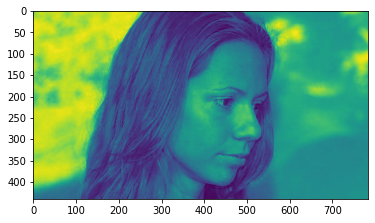

0
255
126.39191500463822
(440, 784)
self.height = 440
self.width  = 784
[0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6
 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3
 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9]
[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3
 3 3 3 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 7 7 7 7
 7 7 7 7 7 7 8 8 8 8 8 8 8 8 8 8 9 9 9 9 9 9 9 9 9 9]
self.input.shape = (100, 2)
(440, 784)


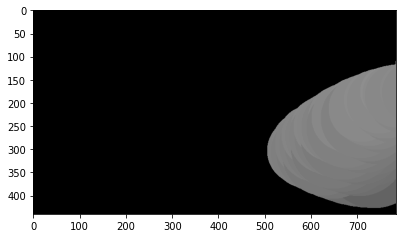

5802508298.0
generation = 0, individum = 0
(440, 784)
current error   = 1534407667.78
best error      = 999999999999.00
self.best error = 999999999999.00
-----< (440, 784)
-----< 85.0
-----< 191.0


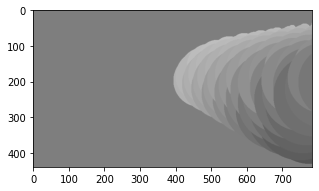

generation = 0, individum = 1
(440, 784)
current error   = 1514830267.38
best error      = 1534407667.78
self.best error = 999999999999.00
-----< (440, 784)
-----< 103.0
-----< 146.0


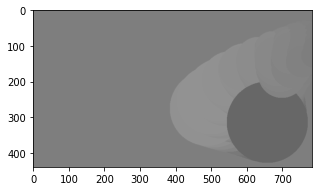

generation = 0, individum = 2
(440, 784)
current error   = 1459602329.39
best error      = 1514830267.38
self.best error = 999999999999.00
-----< (440, 784)
-----< 106.0
-----< 128.0


/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2


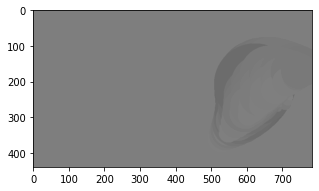

generation = 0, individum = 3
(440, 784)
current error   = 1509164311.57
best error      = 1459602329.39
self.best error = 999999999999.00
generation = 0, individum = 4
(440, 784)
current error   = 1500339939.13
best error      = 1459602329.39
self.best error = 999999999999.00
generation = 0, individum = 5
(440, 784)
current error   = 1726728355.12
best error      = 1459602329.39
self.best error = 999999999999.00
generation = 0, individum = 6


/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2


(440, 784)
current error   = 1470022973.25
best error      = 1459602329.39
self.best error = 999999999999.00
generation = 0, individum = 7
(440, 784)
current error   = 1484386378.77
best error      = 1459602329.39
self.best error = 999999999999.00
generation = 0, individum = 8
(440, 784)


/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2


current error   = 1556519379.27
best error      = 1459602329.39
self.best error = 999999999999.00
generation = 0, individum = 9
(440, 784)
current error   = 1504129376.42
best error      = 1459602329.39
self.best error = 999999999999.00
generation = 1, individum = 0
(440, 784)
current error   = 1730469909.60
best error      = 1459602329.39
self.best error = 1459602329.39
generation = 1, individum = 1
(440, 784)
current error   = 1586036026.98
best error      = 1459602329.39
self.best error = 1459602329.39
generation = 1, individum = 2
(440, 784)
current error   = 1570182777.76
best error      = 1459602329.39
self.best error = 1459602329.39
generation = 1, individum = 3
(440, 784)
current error   = 1473200792.12
best error      = 1459602329.39
self.best error = 1459602329.39
generation = 1, individum = 4
(440, 784)


/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountere

current error   = 1481019739.88
best error      = 1459602329.39
self.best error = 1459602329.39
generation = 1, individum = 5
(440, 784)
current error   = 1707871677.10
best error      = 1459602329.39
self.best error = 1459602329.39
generation = 1, individum = 6
(440, 784)
current error   = 1435663138.78
best error      = 1459602329.39
self.best error = 1459602329.39
-----< (440, 784)
-----< 103.0
-----< 150.0


/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2


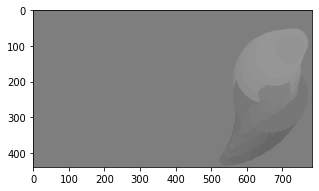

generation = 1, individum = 7
(440, 784)
current error   = 1601639392.59
best error      = 1435663138.78
self.best error = 1459602329.39
generation = 1, individum = 8
(440, 784)
current error   = 1483742167.56
best error      = 1435663138.78
self.best error = 1459602329.39
generation = 1, individum = 9
(440, 784)


/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2


current error   = 1464937496.50
best error      = 1435663138.78
self.best error = 1459602329.39
generation = 2, individum = 0
(440, 784)
current error   = 1660002782.12
best error      = 1435663138.78
self.best error = 1435663138.78
generation = 2, individum = 1
(440, 784)
current error   = 1466703272.72
best error      = 1435663138.78
self.best error = 1435663138.78
generation = 2, individum = 2
(440, 784)
current error   = 1573945839.86
best error      = 1435663138.78
self.best error = 1435663138.78
generation = 2, individum = 3
(440, 784)


/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountere

current error   = 1579052193.21
best error      = 1435663138.78
self.best error = 1435663138.78
generation = 2, individum = 4
(440, 784)
current error   = 1525884300.42
best error      = 1435663138.78
self.best error = 1435663138.78
generation = 2, individum = 5
(440, 784)
current error   = 1542420105.55
best error      = 1435663138.78
self.best error = 1435663138.78
generation = 2, individum = 6
(440, 784)
current error   = 1511725922.33
best error      = 1435663138.78
self.best error = 1435663138.78
generation = 2, individum = 7
(440, 784)
current error   = 1529509949.07
best error      = 1435663138.78
self.best error = 1435663138.78
generation = 2, individum = 8
(440, 784)
current error   = 1408164014.66
best error      = 1435663138.78
self.best error = 1435663138.78
-----< (440, 784)
-----< 93.0
-----< 194.0


/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2


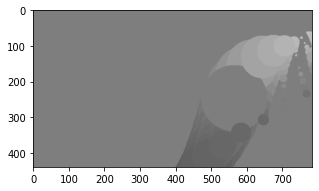

generation = 2, individum = 9
(440, 784)
current error   = 1438157908.11
best error      = 1408164014.66
self.best error = 1435663138.78
generation = 3, individum = 0
(440, 784)
current error   = 1503661276.85
best error      = 1408164014.66
self.best error = 1408164014.66
generation = 3, individum = 1
(440, 784)
current error   = 1659713280.70
best error      = 1408164014.66
self.best error = 1408164014.66
generation = 3, individum = 2
(440, 784)
current error   = 1422415067.71
best error      = 1408164014.66
self.best error = 1408164014.66
generation = 3, individum = 3
(440, 784)


/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountere

current error   = 1424644567.72
best error      = 1408164014.66
self.best error = 1408164014.66
generation = 3, individum = 4
(440, 784)
current error   = 1489123554.47
best error      = 1408164014.66
self.best error = 1408164014.66
generation = 3, individum = 5
(440, 784)
current error   = 1810762800.75
best error      = 1408164014.66
self.best error = 1408164014.66
generation = 3, individum = 6
(440, 784)
current error   = 1647641488.93
best error      = 1408164014.66
self.best error = 1408164014.66
generation = 3, individum = 7
(440, 784)


/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountere

current error   = 1484816249.60
best error      = 1408164014.66
self.best error = 1408164014.66
generation = 3, individum = 8
(440, 784)
current error   = 1615867975.09
best error      = 1408164014.66
self.best error = 1408164014.66
generation = 3, individum = 9
(440, 784)
current error   = 1370474966.72
best error      = 1408164014.66
self.best error = 1408164014.66
-----< (440, 784)
-----< 75.0
-----< 202.0


/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2


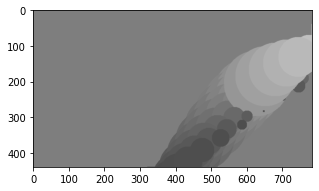

generation = 4, individum = 0
(440, 784)
current error   = 1491268246.97
best error      = 1370474966.72
self.best error = 1370474966.72
generation = 4, individum = 1
(440, 784)
current error   = 1755495223.06
best error      = 1370474966.72
self.best error = 1370474966.72
generation = 4, individum = 2
(440, 784)
current error   = 1425188846.80
best error      = 1370474966.72
self.best error = 1370474966.72
generation = 4, individum = 3
(440, 784)


/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountere

current error   = 1487687884.04
best error      = 1370474966.72
self.best error = 1370474966.72
generation = 4, individum = 4
(440, 784)
current error   = 2505421151.03
best error      = 1370474966.72
self.best error = 1370474966.72
generation = 4, individum = 5
(440, 784)
current error   = 1469076712.89
best error      = 1370474966.72
self.best error = 1370474966.72
generation = 4, individum = 6
(440, 784)
current error   = 1943251572.82
best error      = 1370474966.72
self.best error = 1370474966.72
generation = 4, individum = 7
(440, 784)


/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountere

current error   = 1489842861.53
best error      = 1370474966.72
self.best error = 1370474966.72
generation = 4, individum = 8
(440, 784)
current error   = 1510079903.61
best error      = 1370474966.72
self.best error = 1370474966.72
generation = 4, individum = 9
(440, 784)
current error   = 1515628079.21
best error      = 1370474966.72
self.best error = 1370474966.72
generation = 5, individum = 0
(440, 784)
current error   = 1416796964.05
best error      = 1370474966.72
self.best error = 1370474966.72
generation = 5, individum = 1
(440, 784)
current error   = 1406209961.15
best error      = 1370474966.72
self.best error = 1370474966.72
generation = 5, individum = 2
(440, 784)
current error   = 1473427013.63
best error      = 1370474966.72
self.best error = 1370474966.72
generation = 5, individum = 3
(440, 784)


/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountere

current error   = 1448162334.77
best error      = 1370474966.72
self.best error = 1370474966.72
generation = 5, individum = 4
(440, 784)
current error   = 1771734927.84
best error      = 1370474966.72
self.best error = 1370474966.72
generation = 5, individum = 5
(440, 784)
current error   = 1453336368.62
best error      = 1370474966.72
self.best error = 1370474966.72
generation = 5, individum = 6
(440, 784)
current error   = 1496764797.30
best error      = 1370474966.72
self.best error = 1370474966.72
generation = 5, individum = 7
(440, 784)
current error   = 1491847943.92
best error      = 1370474966.72
self.best error = 1370474966.72
generation = 5, individum = 8
(440, 784)
current error   = 1500835098.41
best error      = 1370474966.72
self.best error = 1370474966.72
generation = 5, individum = 9
(440, 784)


/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountere

current error   = 1436246230.35
best error      = 1370474966.72
self.best error = 1370474966.72
generation = 6, individum = 0
(440, 784)
current error   = 1483059370.90
best error      = 1370474966.72
self.best error = 1370474966.72
generation = 6, individum = 1
(440, 784)
current error   = 1780845407.69
best error      = 1370474966.72
self.best error = 1370474966.72
generation = 6, individum = 2
(440, 784)
current error   = 1671191756.47
best error      = 1370474966.72
self.best error = 1370474966.72
generation = 6, individum = 3
(440, 784)


/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountere

current error   = 1465975927.50
best error      = 1370474966.72
self.best error = 1370474966.72
generation = 6, individum = 4
(440, 784)
current error   = 2167425152.71
best error      = 1370474966.72
self.best error = 1370474966.72
generation = 6, individum = 5
(440, 784)
current error   = 1878383224.62
best error      = 1370474966.72
self.best error = 1370474966.72
generation = 6, individum = 6
(440, 784)
current error   = 1655939264.56
best error      = 1370474966.72
self.best error = 1370474966.72
generation = 6, individum = 7
(440, 784)


/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2


current error   = 1731872691.60
best error      = 1370474966.72
self.best error = 1370474966.72
generation = 6, individum = 8
(440, 784)
current error   = 1481999726.97
best error      = 1370474966.72
self.best error = 1370474966.72
generation = 6, individum = 9
(440, 784)
current error   = 1582119063.96
best error      = 1370474966.72
self.best error = 1370474966.72
generation = 7, individum = 0
(440, 784)


/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountere

current error   = 1434802391.19
best error      = 1370474966.72
self.best error = 1370474966.72
generation = 7, individum = 1
(440, 784)
current error   = 1373614844.71
best error      = 1370474966.72
self.best error = 1370474966.72
generation = 7, individum = 2
(440, 784)
current error   = 1469314028.84
best error      = 1370474966.72
self.best error = 1370474966.72
generation = 7, individum = 3
(440, 784)
current error   = 1452051696.74
best error      = 1370474966.72
self.best error = 1370474966.72
generation = 7, individum = 4
(440, 784)
current error   = 1412313641.74
best error      = 1370474966.72
self.best error = 1370474966.72
generation = 7, individum = 5
(440, 784)
current error   = 1472036938.51
best error      = 1370474966.72
self.best error = 1370474966.72
generation = 7, individum = 6
(440, 784)
current error   = 1509219431.72
best error      = 1370474966.72
self.best error = 1370474966.72
generation = 7, individum = 7
(440, 784)
current error   = 1603911882.53
best erro

/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2


current error   = 1489096665.26
best error      = 1370474966.72
self.best error = 1370474966.72
generation = 7, individum = 9
(440, 784)
current error   = 1504961051.69
best error      = 1370474966.72
self.best error = 1370474966.72
generation = 8, individum = 0
(440, 784)
current error   = 1371369237.64
best error      = 1370474966.72
self.best error = 1370474966.72
generation = 8, individum = 1
(440, 784)
current error   = 3037005367.84
best error      = 1370474966.72
self.best error = 1370474966.72


/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2


generation = 8, individum = 2
(440, 784)
current error   = 1595643927.03
best error      = 1370474966.72
self.best error = 1370474966.72
generation = 8, individum = 3
(440, 784)
current error   = 1545147436.35
best error      = 1370474966.72
self.best error = 1370474966.72
generation = 8, individum = 4
(440, 784)
current error   = 1474148403.74
best error      = 1370474966.72
self.best error = 1370474966.72
generation = 8, individum = 5
(440, 784)
current error   = 1523277582.77
best error      = 1370474966.72
self.best error = 1370474966.72
generation = 8, individum = 6
(440, 784)
current error   = 1432432592.68
best error      = 1370474966.72
self.best error = 1370474966.72
generation = 8, individum = 7
(440, 784)


/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountere

current error   = 1685108646.49
best error      = 1370474966.72
self.best error = 1370474966.72
generation = 8, individum = 8
(440, 784)
current error   = 1425309006.84
best error      = 1370474966.72
self.best error = 1370474966.72
generation = 8, individum = 9
(440, 784)
current error   = 1466092685.15
best error      = 1370474966.72
self.best error = 1370474966.72
generation = 9, individum = 0
(440, 784)
current error   = 1457627785.31
best error      = 1370474966.72
self.best error = 1370474966.72
generation = 9, individum = 1
(440, 784)


/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountere

current error   = 1520205339.12
best error      = 1370474966.72
self.best error = 1370474966.72
generation = 9, individum = 2
(440, 784)
current error   = 1377770810.74
best error      = 1370474966.72
self.best error = 1370474966.72
generation = 9, individum = 3
(440, 784)
current error   = 1480753637.84
best error      = 1370474966.72
self.best error = 1370474966.72
generation = 9, individum = 4
(440, 784)


/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2


current error   = 1880632645.97
best error      = 1370474966.72
self.best error = 1370474966.72
generation = 9, individum = 5
(440, 784)
current error   = 1566931068.47
best error      = 1370474966.72
self.best error = 1370474966.72
generation = 9, individum = 6
(440, 784)
current error   = 1483127451.51
best error      = 1370474966.72
self.best error = 1370474966.72
generation = 9, individum = 7
(440, 784)
current error   = 1709833576.75
best error      = 1370474966.72
self.best error = 1370474966.72
generation = 9, individum = 8
(440, 784)


/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountere

current error   = 1839014828.62
best error      = 1370474966.72
self.best error = 1370474966.72
generation = 9, individum = 9
(440, 784)
current error   = 1381841577.77
best error      = 1370474966.72
self.best error = 1370474966.72
generation = 10, individum = 0
(440, 784)
current error   = 1560644937.14
best error      = 1370474966.72
self.best error = 1370474966.72
generation = 10, individum = 1
(440, 784)
current error   = 1490988673.24
best error      = 1370474966.72
self.best error = 1370474966.72
generation = 10, individum = 2
(440, 784)


/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountere

current error   = 1832552658.40
best error      = 1370474966.72
self.best error = 1370474966.72
generation = 10, individum = 3
(440, 784)
current error   = 1386490125.69
best error      = 1370474966.72
self.best error = 1370474966.72
generation = 10, individum = 4
(440, 784)
current error   = 1582046209.66
best error      = 1370474966.72
self.best error = 1370474966.72
generation = 10, individum = 5
(440, 784)
current error   = 1608081376.24
best error      = 1370474966.72
self.best error = 1370474966.72
generation = 10, individum = 6
(440, 784)


/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountere

current error   = 1463188603.59
best error      = 1370474966.72
self.best error = 1370474966.72
generation = 10, individum = 7
(440, 784)
current error   = 1450049147.42
best error      = 1370474966.72
self.best error = 1370474966.72
generation = 10, individum = 8
(440, 784)
current error   = 1412004786.76
best error      = 1370474966.72
self.best error = 1370474966.72
generation = 10, individum = 9
(440, 784)
current error   = 1593377710.77
best error      = 1370474966.72
self.best error = 1370474966.72
generation = 11, individum = 0
(440, 784)


/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountere

current error   = 1475458435.87
best error      = 1370474966.72
self.best error = 1370474966.72
generation = 11, individum = 1
(440, 784)
current error   = 1455273109.39
best error      = 1370474966.72
self.best error = 1370474966.72
generation = 11, individum = 2
(440, 784)
current error   = 1796401411.07
best error      = 1370474966.72
self.best error = 1370474966.72
generation = 11, individum = 3
(440, 784)


/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2


current error   = 1470479063.76
best error      = 1370474966.72
self.best error = 1370474966.72
generation = 11, individum = 4
(440, 784)
current error   = 1452981562.27
best error      = 1370474966.72
self.best error = 1370474966.72
generation = 11, individum = 5
(440, 784)
current error   = 1531261078.72
best error      = 1370474966.72
self.best error = 1370474966.72
generation = 11, individum = 6
(440, 784)
current error   = 1723209424.85
best error      = 1370474966.72
self.best error = 1370474966.72
generation = 11, individum = 7
(440, 784)
current error   = 1492136741.69
best error      = 1370474966.72
self.best error = 1370474966.72
generation = 11, individum = 8
(440, 784)


/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountere

current error   = 1606248717.47
best error      = 1370474966.72
self.best error = 1370474966.72
generation = 11, individum = 9
(440, 784)
current error   = 1487414280.91
best error      = 1370474966.72
self.best error = 1370474966.72
generation = 12, individum = 0
(440, 784)
current error   = 1492087056.41
best error      = 1370474966.72
self.best error = 1370474966.72
generation = 12, individum = 1
(440, 784)
current error   = 1628572906.02
best error      = 1370474966.72
self.best error = 1370474966.72
generation = 12, individum = 2
(440, 784)


/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountere

current error   = 1540762154.61
best error      = 1370474966.72
self.best error = 1370474966.72
generation = 12, individum = 3
(440, 784)
current error   = 1487612926.57
best error      = 1370474966.72
self.best error = 1370474966.72
generation = 12, individum = 4
(440, 784)
current error   = 1561042074.06
best error      = 1370474966.72
self.best error = 1370474966.72
generation = 12, individum = 5
(440, 784)


/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2


current error   = 1403798139.99
best error      = 1370474966.72
self.best error = 1370474966.72
generation = 12, individum = 6
(440, 784)
current error   = 1417999275.30
best error      = 1370474966.72
self.best error = 1370474966.72
generation = 12, individum = 7
(440, 784)
current error   = 1494377398.52
best error      = 1370474966.72
self.best error = 1370474966.72
generation = 12, individum = 8
(440, 784)
current error   = 1586318713.85
best error      = 1370474966.72
self.best error = 1370474966.72
generation = 12, individum = 9
(440, 784)


/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountere

current error   = 1404956799.04
best error      = 1370474966.72
self.best error = 1370474966.72
generation = 13, individum = 0
(440, 784)
current error   = 1399194064.30
best error      = 1370474966.72
self.best error = 1370474966.72
generation = 13, individum = 1
(440, 784)
current error   = 1660091637.29
best error      = 1370474966.72
self.best error = 1370474966.72
generation = 13, individum = 2
(440, 784)
current error   = 1561090771.74
best error      = 1370474966.72
self.best error = 1370474966.72
generation = 13, individum = 3
(440, 784)
current error   = 1476189844.90
best error      = 1370474966.72
self.best error = 1370474966.72


/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountere

generation = 13, individum = 4
(440, 784)
current error   = 1432994352.13
best error      = 1370474966.72
self.best error = 1370474966.72
generation = 13, individum = 5
(440, 784)
current error   = 1548088050.81
best error      = 1370474966.72
self.best error = 1370474966.72
generation = 13, individum = 6
(440, 784)
current error   = 1433084482.84
best error      = 1370474966.72
self.best error = 1370474966.72
generation = 13, individum = 7
(440, 784)
current error   = 1457363832.82
best error      = 1370474966.72
self.best error = 1370474966.72
generation = 13, individum = 8
(440, 784)


/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2


current error   = 1748722030.11
best error      = 1370474966.72
self.best error = 1370474966.72
generation = 13, individum = 9
(440, 784)
current error   = 1463993656.19
best error      = 1370474966.72
self.best error = 1370474966.72
generation = 14, individum = 0
(440, 784)
current error   = 1899686107.02
best error      = 1370474966.72
self.best error = 1370474966.72
generation = 14, individum = 1
(440, 784)
current error   = 1363633823.85
best error      = 1370474966.72
self.best error = 1370474966.72
-----< (440, 784)
-----< 71.0
-----< 220.0


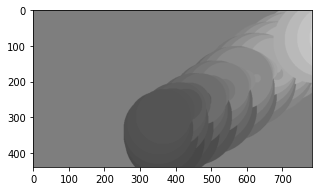

generation = 14, individum = 2
(440, 784)
current error   = 1360679061.65
best error      = 1363633823.85
self.best error = 1370474966.72
-----< (440, 784)
-----< 51.0
-----< 240.0


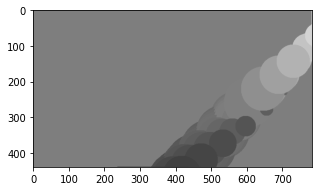

generation = 14, individum = 3
(440, 784)
current error   = 1498017041.04
best error      = 1360679061.65
self.best error = 1370474966.72
generation = 14, individum = 4
(440, 784)
current error   = 1495459862.09
best error      = 1360679061.65
self.best error = 1370474966.72
generation = 14, individum = 5
(440, 784)


/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2


current error   = 1794882493.82
best error      = 1360679061.65
self.best error = 1370474966.72
generation = 14, individum = 6
(440, 784)
current error   = 1711863815.73
best error      = 1360679061.65
self.best error = 1370474966.72
generation = 14, individum = 7
(440, 784)
current error   = 1450993510.46
best error      = 1360679061.65
self.best error = 1370474966.72
generation = 14, individum = 8
(440, 784)
current error   = 1383393972.32
best error      = 1360679061.65
self.best error = 1370474966.72
generation = 14, individum = 9
(440, 784)
current error   = 1447518159.30
best error      = 1360679061.65

/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountere


self.best error = 1370474966.72
generation = 15, individum = 0
(440, 784)
current error   = 1590813027.30
best error      = 1360679061.65
self.best error = 1360679061.65
generation = 15, individum = 1
(440, 784)
current error   = 1670308242.12
best error      = 1360679061.65
self.best error = 1360679061.65
generation = 15, individum = 2
(440, 784)
current error   = 1418123675.22
best error      = 1360679061.65
self.best error = 1360679061.65
generation = 15, individum = 3
(440, 784)


/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2


current error   = 1704412497.19
best error      = 1360679061.65
self.best error = 1360679061.65
generation = 15, individum = 4
(440, 784)
current error   = 2214883305.73
best error      = 1360679061.65
self.best error = 1360679061.65
generation = 15, individum = 5
(440, 784)
current error   = 1692512953.62
best error      = 1360679061.65
self.best error = 1360679061.65
generation = 15, individum = 6
(440, 784)
current error   = 1371864610.10
best error      = 1360679061.65
self.best error = 1360679061.65
generation = 15, individum = 7
(440, 784)


/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2


current error   = 1713449447.30
best error      = 1360679061.65
self.best error = 1360679061.65
generation = 15, individum = 8
(440, 784)
current error   = 1481288347.03
best error      = 1360679061.65
self.best error = 1360679061.65
generation = 15, individum = 9
(440, 784)
current error   = 1711993578.66
best error      = 1360679061.65
self.best error = 1360679061.65
generation = 16, individum = 0
(440, 784)
current error   = 1401445391.17
best error      = 1360679061.65
self.best error = 1360679061.65
generation = 16, individum = 1
(440, 784)
current error   = 1479507793.30
best error      = 1360679061.65
self.best error = 1360679061.65
generation = 16, individum = 2
(440, 784)


/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountere

current error   = 1422741124.71
best error      = 1360679061.65
self.best error = 1360679061.65
generation = 16, individum = 3
(440, 784)
current error   = 1445770158.24
best error      = 1360679061.65
self.best error = 1360679061.65
generation = 16, individum = 4
(440, 784)
current error   = 1456023262.36
best error      = 1360679061.65
self.best error = 1360679061.65
generation = 16, individum = 5
(440, 784)
current error   = 1456552944.61
best error      = 1360679061.65
self.best error = 1360679061.65
generation = 16, individum = 6
(440, 784)


/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2


current error   = 1450563877.29
best error      = 1360679061.65
self.best error = 1360679061.65
generation = 16, individum = 7
(440, 784)
current error   = 1557490724.06
best error      = 1360679061.65
self.best error = 1360679061.65
generation = 16, individum = 8
(440, 784)
current error   = 1423547253.53
best error      = 1360679061.65
self.best error = 1360679061.65
generation = 16, individum = 9
(440, 784)
current error   = 1470992892.25
best error      = 1360679061.65
self.best error = 1360679061.65
generation = 17, individum = 0
(440, 784)
current error   = 1514321590.37
best error      = 1360679061.65
self.best error = 1360679061.65
generation = 17, individum = 1
(440, 784)
current error   = 1690880416.04
best error      = 1360679061.65
self.best error = 1360679061.65
generation = 17, individum = 2
(440, 784)
current error   = 1620750227.99
best error      = 1360679061.65
self.best error = 1360679061.65
generation = 17, individum = 3
(440, 784)
current error   = 1375405487.28
be

/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountere

generation = 17, individum = 5
(440, 784)
current error   = 1409379802.49
best error      = 1360679061.65
self.best error = 1360679061.65
generation = 17, individum = 6
(440, 784)
current error   = 1300936322.23
best error      = 1360679061.65
self.best error = 1360679061.65
-----< (440, 784)
-----< 42.0
-----< 263.0


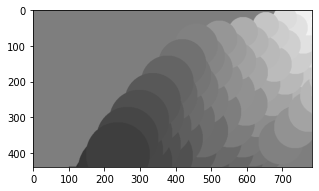

generation = 17, individum = 7
(440, 784)
current error   = 1452005538.35
best error      = 1300936322.23
self.best error = 1360679061.65
generation = 17, individum = 8
(440, 784)
current error   = 1445562806.89
best error      = 1300936322.23
self.best error = 1360679061.65
generation = 17, individum = 9
(440, 784)
current error   = 1437743729.62
best error      = 1300936322.23
self.best error = 1360679061.65
generation = 18, individum = 0
(440, 784)


/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2


current error   = 1628421992.58
best error      = 1300936322.23
self.best error = 1300936322.23
generation = 18, individum = 1
(440, 784)
current error   = 1478240894.66
best error      = 1300936322.23
self.best error = 1300936322.23
generation = 18, individum = 2
(440, 784)
current error   = 1567179383.20
best error      = 1300936322.23
self.best error = 1300936322.23
generation = 18, individum = 3
(440, 784)
current error   = 1617023975.29
best error      = 1300936322.23
self.best error = 1300936322.23
generation = 18, individum = 4
(440, 784)
current error   = 1335059870.54
best error      = 1300936322.23
self.best error = 1300936322.23
generation = 18, individum = 5
(440, 784)
current error   = 1863509623.20
best error      = 1300936322.23
self.best error = 1300936322.23
generation = 18, individum = 6
(440, 784)
current error   = 1772163714.93
best error      = 1300936322.23
self.best error = 1300936322.23
generation = 18, individum = 7
(440, 784)
current error   = 2065453809.33
be

/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2


current error   = 1444570866.61
best error      = 1300936322.23
self.best error = 1300936322.23
generation = 20, individum = 1
(440, 784)
current error   = 1720681441.03
best error      = 1300936322.23
self.best error = 1300936322.23
generation = 20, individum = 2
(440, 784)
current error   = 1993088464.60
best error      = 1300936322.23
self.best error = 1300936322.23
generation = 20, individum = 3
(440, 784)
current error   = 1490898582.32
best error      = 1300936322.23
self.best error = 1300936322.23
generation = 20, individum = 4
(440, 784)
current error   = 1151439082.78
best error      = 1300936322.23
self.best error = 1300936322.23
-----< (440, 784)
-----< 39.0
-----< 257.0


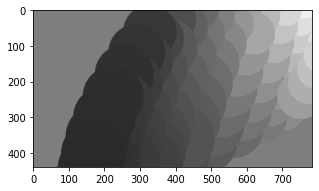

generation = 20, individum = 5
(440, 784)
current error   = 1781390935.58
best error      = 1151439082.78
self.best error = 1300936322.23
generation = 20, individum = 6
(440, 784)
current error   = 1955724659.18
best error      = 1151439082.78
self.best error = 1300936322.23
generation = 20, individum = 7
(440, 784)
current error   = 1988636679.18
best error      = 1151439082.78
self.best error = 1300936322.23
generation = 20, individum = 8
(440, 784)
current error   = 1952322491.23
best error      = 1151439082.78
self.best error = 1300936322.23
generation = 20, individum = 9
(440, 784)
current error   = 1420921569.38
best error      = 1151439082.78
self.best error = 1300936322.23
generation = 21, individum = 0
(440, 784)
current error   = 1229632346.44
best error      = 1151439082.78
self.best error = 1151439082.78
generation = 21, individum = 1
(440, 784)
current error   = 1403171858.92
best error      = 1151439082.78
self.best error = 1151439082.78
generation = 21, individum = 2
(44

/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2


(440, 784)
current error   = 1620880402.50
best error      = 1151439082.78
self.best error = 1151439082.78
generation = 21, individum = 7
(440, 784)
current error   = 2013713257.88
best error      = 1151439082.78
self.best error = 1151439082.78
generation = 21, individum = 8
(440, 784)


/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2


current error   = 1493275445.86
best error      = 1151439082.78
self.best error = 1151439082.78
generation = 21, individum = 9
(440, 784)
current error   = 1788629489.39
best error      = 1151439082.78
self.best error = 1151439082.78
generation = 22, individum = 0
(440, 784)
current error   = 2580081159.26
best error      = 1151439082.78
self.best error = 1151439082.78
generation = 22, individum = 1
(440, 784)
current error   = 1455575313.14
best error      = 1151439082.78
self.best error = 1151439082.78
generation = 22, individum = 2
(440, 784)
current error   = 1996361131.97
best error      = 1151439082.78
self.best error = 1151439082.78
generation = 22, individum = 3
(440, 784)
current error   = 2002043725.91
best error      = 1151439082.78
self.best error = 1151439082.78
generation = 22, individum = 4
(440, 784)


/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2


current error   = 1234948081.70
best error      = 1151439082.78
self.best error = 1151439082.78
generation = 22, individum = 5
(440, 784)
current error   = 2308040674.22
best error      = 1151439082.78
self.best error = 1151439082.78
generation = 22, individum = 6
(440, 784)
current error   = 2082542483.88
best error      = 1151439082.78
self.best error = 1151439082.78
generation = 22, individum = 7
(440, 784)
current error   = 1657930595.97
best error      = 1151439082.78
self.best error = 1151439082.78
generation = 22, individum = 8
(440, 784)
current error   = 1485340267.24
best error      = 1151439082.78
self.best error = 1151439082.78
generation = 22, individum = 9
(440, 784)
current error   = 1466219649.80
best error      = 1151439082.78
self.best error = 1151439082.78
generation = 23, individum = 0
(440, 784)
current error   = 1741386470.24
best error      = 1151439082.78
self.best error = 1151439082.78
generation = 23, individum = 1
(440, 784)
current error   = 1673784858.66
be

/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2


current error   = 1566688448.48
best error      = 1151439082.78
self.best error = 1151439082.78
generation = 23, individum = 3
(440, 784)
current error   = 1208687599.30
best error      = 1151439082.78
self.best error = 1151439082.78
generation = 23, individum = 4
(440, 784)
current error   = 1304427358.41
best error      = 1151439082.78
self.best error = 1151439082.78
generation = 23, individum = 5
(440, 784)
current error   = 2098504957.64
best error      = 1151439082.78
self.best error = 1151439082.78
generation = 23, individum = 6
(440, 784)
current error   = 1308410635.43
best error      = 1151439082.78
self.best error = 1151439082.78
generation = 23, individum = 7
(440, 784)
current error   = 1501648629.42
best error      = 1151439082.78
self.best error = 1151439082.78
generation = 23, individum = 8
(440, 784)
current error   = 2739350717.66
best error      = 1151439082.78
self.best error = 1151439082.78
generation = 23, individum = 9
(440, 784)


/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2


current error   = 1276134620.33
best error      = 1151439082.78
self.best error = 1151439082.78
generation = 24, individum = 0
(440, 784)
current error   = 2013303098.62
best error      = 1151439082.78
self.best error = 1151439082.78
generation = 24, individum = 1
(440, 784)
current error   = 1581143409.61
best error      = 1151439082.78
self.best error = 1151439082.78
generation = 24, individum = 2
(440, 784)
current error   = 1386733196.24
best error      = 1151439082.78


/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2


self.best error = 1151439082.78
generation = 24, individum = 3
(440, 784)
current error   = 1417516069.09
best error      = 1151439082.78
self.best error = 1151439082.78
generation = 24, individum = 4
(440, 784)
current error   = 2399685836.51
best error      = 1151439082.78
self.best error = 1151439082.78
generation = 24, individum = 5
(440, 784)


/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2


current error   = 1620664593.70
best error      = 1151439082.78
self.best error = 1151439082.78
generation = 24, individum = 6
(440, 784)
current error   = 1969285859.67
best error      = 1151439082.78
self.best error = 1151439082.78
generation = 24, individum = 7
(440, 784)
current error   = 2328500075.96
best error      = 1151439082.78
self.best error = 1151439082.78
generation = 24, individum = 8
(440, 784)
current error   = 3924097222.84
best error      = 1151439082.78
self.best error = 1151439082.78
generation = 24, individum = 9
(440, 784)
current error   = 1323862165.35
best error      = 1151439082.78
self.best error = 1151439082.78
generation = 25, individum = 0
(440, 784)
current error   = 1262666662.83
best error      = 1151439082.78
self.best error = 1151439082.78
generation = 25, individum = 1
(440, 784)
current error   = 1638447542.02
best error      = 1151439082.78
self.best error = 1151439082.78
generation = 25, individum = 2
(440, 784)
current error   = 1807054379.89
be

/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2


current error   = 1771077295.78
best error      = 1151439082.78
self.best error = 1151439082.78
generation = 25, individum = 6
(440, 784)
current error   = 1957544588.47
best error      = 1151439082.78
self.best error = 1151439082.78
generation = 25, individum = 7
(440, 784)
current error   = 1464166264.53
best error      = 1151439082.78
self.best error = 1151439082.78
generation = 25, individum = 8
(440, 784)
current error   = 1200591177.39
best error      = 1151439082.78
self.best error = 1151439082.78
generation = 25, individum = 9
(440, 784)
current error   = 1459941474.71
best error      = 1151439082.78
self.best error = 1151439082.78
generation = 26, individum = 0
(440, 784)


/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2


current error   = 1894974529.52
best error      = 1151439082.78
self.best error = 1151439082.78
generation = 26, individum = 1
(440, 784)
current error   = 1350306019.66
best error      = 1151439082.78
self.best error = 1151439082.78
generation = 26, individum = 2
(440, 784)
current error   = 1728710646.18
best error      = 1151439082.78
self.best error = 1151439082.78
generation = 26, individum = 3
(440, 784)
current error   = 3679162518.58
best error      = 1151439082.78
self.best error = 1151439082.78
generation = 26, individum = 4
(440, 784)
current error   = 3423716432.64
best error      = 1151439082.78
self.best error = 1151439082.78
generation = 26, individum = 5
(440, 784)
current error   = 1899799812.06
best error      = 1151439082.78
self.best error = 1151439082.78
generation = 26, individum = 6
(440, 784)
current error   = 1693129685.39
best error      = 1151439082.78
self.best error = 1151439082.78
generation = 26, individum = 7
(440, 784)
current error   = 2202957878.09
be

/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2


current error   = 2964782205.30
best error      = 1151439082.78
self.best error = 1151439082.78
generation = 26, individum = 9
(440, 784)
current error   = 2291705125.61
best error      = 1151439082.78
self.best error = 1151439082.78
generation = 27, individum = 0
(440, 784)
current error   = 1927992425.15
best error      = 1151439082.78
self.best error = 1151439082.78
generation = 27, individum = 1
(440, 784)
current error   = 1752142183.11
best error      = 1151439082.78
self.best error = 1151439082.78
generation = 27, individum = 2
(440, 784)
current error   = 1721366787.16
best error      = 1151439082.78
self.best error = 1151439082.78
generation = 27, individum = 3
(440, 784)
current error   = 1440700475.24
best error      = 1151439082.78
self.best error = 1151439082.78
generation = 27, individum = 4
(440, 784)
current error   = 1713985853.08
best error      = 1151439082.78
self.best error = 1151439082.78
generation = 27, individum = 5
(440, 784)
current error   = 1273718649.37
be

/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2


current error   = 2297843762.79
best error      = 1151439082.78
self.best error = 1151439082.78
generation = 27, individum = 7
(440, 784)
current error   = 1028127580.32
best error      = 1151439082.78
self.best error = 1151439082.78
-----< (440, 784)
-----< 46.0
-----< 262.0


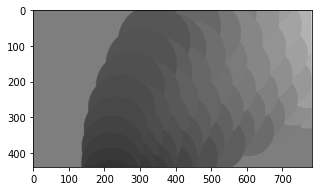

generation = 27, individum = 8
(440, 784)
current error   = 1883727754.74
best error      = 1028127580.32
self.best error = 1151439082.78
generation = 27, individum = 9
(440, 784)
current error   = 1758803591.31
best error      = 1028127580.32
self.best error = 1151439082.78
generation = 28, individum = 0
(440, 784)
current error   = 1765348649.01
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 28, individum = 1
(440, 784)
current error   = 1300847103.42
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 28, individum = 2
(440, 784)
current error   = 1661704289.81
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 28, individum = 3
(440, 784)


/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2


current error   = 1871085266.20
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 28, individum = 4
(440, 784)
current error   = 1727500395.93
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 28, individum = 5
(440, 784)
current error   = 1616971887.78
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 28, individum = 6
(440, 784)
current error   = 1571031411.03
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 28, individum = 7
(440, 784)
current error   = 1907019814.01
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 28, individum = 8
(440, 784)


/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2


current error   = 1321742430.28
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 28, individum = 9
(440, 784)
current error   = 2251976882.06
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 29, individum = 0
(440, 784)
current error   = 1627757716.92
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 29, individum = 1
(440, 784)
current error   = 1450756611.21
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 29, individum = 2
(440, 784)
current error   = 1312791215.66
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 29, individum = 3
(440, 784)
current error   = 1195545694.54
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 29, individum = 4
(440, 784)
current error   = 3915584855.34
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 29, individum = 5
(440, 784)
current error   = 1284061753.88
be

/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2


current error   = 1636985060.78
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 29, individum = 7
(440, 784)
current error   = 1763590144.54
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 29, individum = 8
(440, 784)
current error   = 1629240752.79
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 29, individum = 9
(440, 784)
current error   = 1400661855.45
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 30, individum = 0
(440, 784)
current error   = 1855661213.71
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 30, individum = 1
(440, 784)
current error   = 1433184947.10
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 30, individum = 2
(440, 784)
current error   = 3382692927.68
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 30, individum = 3
(440, 784)
current error   = 1528451090.67
be

/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2


current error   = 1286558760.54
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 30, individum = 5
(440, 784)
current error   = 1274672052.17
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 30, individum = 6
(440, 784)
current error   = 1433118497.58
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 30, individum = 7
(440, 784)
current error   = 1374388420.73
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 30, individum = 8
(440, 784)
current error   = 1345111049.11
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 30, individum = 9
(440, 784)
current error   = 1527361741.46
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 31, individum = 0
(440, 784)
current error   = 1425386123.92
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 31, individum = 1
(440, 784)
current error   = 1370350311.84
be

/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2


current error   = 1067712327.80
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 31, individum = 5
(440, 784)
current error   = 1605002025.87
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 31, individum = 6
(440, 784)
current error   = 2094805601.37
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 31, individum = 7
(440, 784)
current error   = 1566192313.29
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 31, individum = 8
(440, 784)
current error   = 1113743946.40
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 31, individum = 9
(440, 784)
current error   = 1506780581.52
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 32, individum = 0
(440, 784)
current error   = 1297162565.02
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 32, individum = 1
(440, 784)
current error   = 2056509168.71
be

/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2


current error   = 1337661061.40
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 33, individum = 1
(440, 784)
current error   = 1218508073.03
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 33, individum = 2
(440, 784)
current error   = 1867449636.46
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 33, individum = 3
(440, 784)
current error   = 1574547840.77
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 33, individum = 4
(440, 784)
current error   = 1715569362.55
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 33, individum = 5
(440, 784)
current error   = 1638784543.19
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 33, individum = 6
(440, 784)
current error   = 1517499778.96
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 33, individum = 7
(440, 784)
current error   = 1218124245.98
be

/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2


current error   = 1986260398.92
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 35, individum = 0
(440, 784)
current error   = 1997733341.68
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 35, individum = 1
(440, 784)
current error   = 1472091211.61
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 35, individum = 2
(440, 784)
current error   = 2577617582.18
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 35, individum = 3
(440, 784)
current error   = 1387549078.47
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 35, individum = 4
(440, 784)
current error   = 1756863634.95
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 35, individum = 5
(440, 784)
current error   = 1831310873.52
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 35, individum = 6
(440, 784)
current error   = 1285280835.82
be

/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2


current error   = 1662097847.02
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 37, individum = 2
(440, 784)
current error   = 1456974974.06
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 37, individum = 3
(440, 784)
current error   = 1363713466.20
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 37, individum = 4
(440, 784)
current error   = 3035889126.26
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 37, individum = 5
(440, 784)
current error   = 1335921498.68
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 37, individum = 6
(440, 784)
current error   = 1146160098.30
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 37, individum = 7
(440, 784)
current error   = 1498147726.69
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 37, individum = 8
(440, 784)
current error   = 1395312460.97
be

/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2


current error   = 1417375328.30
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 41, individum = 0
(440, 784)
current error   = 1544792949.69
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 41, individum = 1
(440, 784)
current error   = 1318298535.51
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 41, individum = 2
(440, 784)
current error   = 1309180626.37
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 41, individum = 3
(440, 784)


/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2


current error   = 2033568859.90
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 41, individum = 4
(440, 784)
current error   = 1524070048.18
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 41, individum = 5
(440, 784)
current error   = 1195309942.25
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 41, individum = 6
(440, 784)
current error   = 1480560906.11
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 41, individum = 7
(440, 784)
current error   = 1607028930.62
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 41, individum = 8
(440, 784)
current error   = 2289871477.13
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 41, individum = 9
(440, 784)
current error   = 1160508562.25
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 42, individum = 0
(440, 784)
current error   = 1570498039.46
be

/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2


current error   = 1832933395.50
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 42, individum = 9
(440, 784)
current error   = 3044532457.48
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 43, individum = 0
(440, 784)
current error   = 1841120112.46
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 43, individum = 1
(440, 784)


/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2


current error   = 1642616083.36
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 43, individum = 2
(440, 784)
current error   = 2425330867.63
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 43, individum = 3
(440, 784)
current error   = 2695006695.68
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 43, individum = 4
(440, 784)
current error   = 2456251988.95
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 43, individum = 5
(440, 784)
current error   = 1526956511.83
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 43, individum = 6
(440, 784)
current error   = 1437734319.55
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 43, individum = 7
(440, 784)
current error   = 1522844384.60
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 43, individum = 8
(440, 784)
current error   = 1173793699.55
be

/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2


current error   = 1422845271.91
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 44, individum = 0
(440, 784)
current error   = 1494390838.13
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 44, individum = 1
(440, 784)
current error   = 1182536951.40
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 44, individum = 2
(440, 784)
current error   = 1232454157.72
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 44, individum = 3
(440, 784)
current error   = 1477605734.29
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 44, individum = 4
(440, 784)
current error   = 1578609349.80
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 44, individum = 5
(440, 784)
current error   = 3020212474.27
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 44, individum = 6
(440, 784)
current error   = 1554766826.87
be

/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2


current error   = 1192794320.47
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 45, individum = 4
(440, 784)
current error   = 1342934067.74
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 45, individum = 5
(440, 784)
current error   = 1587944821.64
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 45, individum = 6
(440, 784)
current error   = 1804452349.95
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 45, individum = 7
(440, 784)
current error   = 2085953484.84
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 45, individum = 8
(440, 784)
current error   = 1110147344.81
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 45, individum = 9
(440, 784)
current error   = 1415334913.41
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 46, individum = 0
(440, 784)
current error   = 2198319199.43
be

/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2


current error   = 1759668872.54
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 46, individum = 5
(440, 784)
current error   = 2085383035.61
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 46, individum = 6
(440, 784)
current error   = 2148364864.68
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 46, individum = 7
(440, 784)
current error   = 1638184362.24
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 46, individum = 8
(440, 784)
current error   = 2267766581.16
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 46, individum = 9
(440, 784)
current error   = 1234716099.71
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 47, individum = 0
(440, 784)
current error   = 1512023348.10
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 47, individum = 1
(440, 784)
current error   = 1214576996.52
be

/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2


current error   = 1900463047.64
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 47, individum = 3
(440, 784)
current error   = 1397085547.97
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 47, individum = 4
(440, 784)
current error   = 3201630364.00
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 47, individum = 5
(440, 784)
current error   = 1323729458.77
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 47, individum = 6
(440, 784)


/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2


current error   = 2777287114.62
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 47, individum = 7
(440, 784)
current error   = 2197507771.42
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 47, individum = 8
(440, 784)
current error   = 1400721393.36
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 47, individum = 9
(440, 784)
current error   = 1402329813.11
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 48, individum = 0
(440, 784)
current error   = 1637705244.00
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 48, individum = 1
(440, 784)
current error   = 1786373556.71
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 48, individum = 2
(440, 784)
current error   = 1426548422.24
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 48, individum = 3
(440, 784)


/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2


current error   = 1676678102.84
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 48, individum = 4
(440, 784)
current error   = 1368579294.85
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 48, individum = 5
(440, 784)
current error   = 1430642184.29
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 48, individum = 6
(440, 784)
current error   = 1321319278.77
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 48, individum = 7
(440, 784)
current error   = 1732601265.09
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 48, individum = 8
(440, 784)
current error   = 1558342809.47
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 48, individum = 9
(440, 784)
current error   = 1442076664.94
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 49, individum = 0
(440, 784)
current error   = 1604284718.71
be

/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2


current error   = 1691223118.56
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 49, individum = 9
(440, 784)
current error   = 1703042649.64
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 50, individum = 0
(440, 784)
current error   = 1166831611.99
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 50, individum = 1
(440, 784)
current error   = 1324629873.33
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 50, individum = 2
(440, 784)
current error   = 1773003874.22
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 50, individum = 3
(440, 784)
current error   = 1347907496.45
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 50, individum = 4
(440, 784)
current error   = 1439285899.53
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 50, individum = 5
(440, 784)
current error   = 1204336600.62
be

/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2


current error   = 1708644744.79
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 51, individum = 4
(440, 784)
current error   = 1902986263.61
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 51, individum = 5
(440, 784)
current error   = 1220344792.01
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 51, individum = 6
(440, 784)
current error   = 1389741809.87
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 51, individum = 7
(440, 784)
current error   = 1742248174.37
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 51, individum = 8
(440, 784)
current error   = 1729775925.81
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 51, individum = 9
(440, 784)
current error   = 1307041629.81
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 52, individum = 0
(440, 784)
current error   = 2010681370.77
be

/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2


current error   = 1890843625.86
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 52, individum = 5
(440, 784)
current error   = 1397976638.22
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 52, individum = 6
(440, 784)
current error   = 1645653453.11
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 52, individum = 7
(440, 784)
current error   = 1873442095.23
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 52, individum = 8
(440, 784)
current error   = 1468727790.25
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 52, individum = 9
(440, 784)
current error   = 1129098770.13
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 53, individum = 0
(440, 784)


/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2


current error   = 1454994839.14
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 53, individum = 1
(440, 784)
current error   = 1449175047.43
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 53, individum = 2
(440, 784)
current error   = 1309031182.89
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 53, individum = 3
(440, 784)
current error   = 1558111776.79
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 53, individum = 4
(440, 784)
current error   = 1864524925.73
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 53, individum = 5
(440, 784)
current error   = 2174643772.06
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 53, individum = 6
(440, 784)
current error   = 2168555972.63
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 53, individum = 7
(440, 784)


/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2


current error   = 1547890216.29
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 53, individum = 8
(440, 784)
current error   = 1214506047.62
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 53, individum = 9
(440, 784)
current error   = 1502273929.69
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 54, individum = 0
(440, 784)
current error   = 2134346515.73
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 54, individum = 1
(440, 784)
current error   = 1537142662.17
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 54, individum = 2
(440, 784)
current error   = 1645099350.32
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 54, individum = 3
(440, 784)
current error   = 1492682238.06
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 54, individum = 4
(440, 784)
current error   = 1711666702.23
be

/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2


current error   = 1680108411.58
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 55, individum = 1
(440, 784)
current error   = 1653391085.27
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 55, individum = 2
(440, 784)
current error   = 1407959546.90
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 55, individum = 3
(440, 784)
current error   = 1717785580.58
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 55, individum = 4
(440, 784)
current error   = 1966739647.96
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 55, individum = 5
(440, 784)
current error   = 1690239899.47
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 55, individum = 6
(440, 784)
current error   = 1498563147.00
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 55, individum = 7
(440, 784)
current error   = 1719249926.29
be

/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2


current error   = 1294117019.00
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 56, individum = 5
(440, 784)
current error   = 1418304319.52
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 56, individum = 6
(440, 784)
current error   = 1375207759.38
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 56, individum = 7
(440, 784)


/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2


current error   = 1948584727.87
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 56, individum = 8
(440, 784)
current error   = 1372245905.85
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 56, individum = 9
(440, 784)
current error   = 2035307155.62
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 57, individum = 0
(440, 784)


/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2


current error   = 2858858553.60
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 57, individum = 1
(440, 784)
current error   = 2566052603.77
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 57, individum = 2
(440, 784)
current error   = 1536041816.39
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 57, individum = 3
(440, 784)
current error   = 1393317057.18
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 57, individum = 4
(440, 784)
current error   = 2375910354.00
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 57, individum = 5
(440, 784)
current error   = 1724714054.76
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 57, individum = 6
(440, 784)
current error   = 1491880430.99
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 57, individum = 7
(440, 784)
current error   = 2124067145.99
be

/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2


current error   = 1423147671.37
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 57, individum = 9
(440, 784)
current error   = 2248069675.30
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 58, individum = 0
(440, 784)
current error   = 1349470207.70
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 58, individum = 1
(440, 784)


/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2


current error   = 1224730299.94
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 58, individum = 2
(440, 784)
current error   = 1615900286.90
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 58, individum = 3
(440, 784)
current error   = 2509155618.94
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 58, individum = 4
(440, 784)
current error   = 1376065111.77
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 58, individum = 5
(440, 784)
current error   = 2173183936.67
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 58, individum = 6
(440, 784)
current error   = 1562115995.33
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 58, individum = 7
(440, 784)
current error   = 1729450602.61
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 58, individum = 8
(440, 784)


/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2


current error   = 1213364690.39
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 58, individum = 9
(440, 784)
current error   = 2163933233.09
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 59, individum = 0
(440, 784)
current error   = 1651182704.76
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 59, individum = 1
(440, 784)
current error   = 1448808612.52
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 59, individum = 2
(440, 784)


/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2


current error   = 1446822038.12
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 59, individum = 3
(440, 784)
current error   = 1403507152.17
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 59, individum = 4
(440, 784)
current error   = 1298445363.12
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 59, individum = 5
(440, 784)


/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2


current error   = 2050311317.39
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 59, individum = 6
(440, 784)
current error   = 1678964858.91
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 59, individum = 7
(440, 784)
current error   = 1756896405.47
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 59, individum = 8
(440, 784)
current error   = 1478370578.67
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 59, individum = 9
(440, 784)
current error   = 1469955422.97
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 60, individum = 0
(440, 784)
current error   = 2448122931.31
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 60, individum = 1
(440, 784)
current error   = 3497257341.61
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 60, individum = 2
(440, 784)
current error   = 1216076265.08
be

/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2


current error   = 2033338614.40
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 61, individum = 0
(440, 784)
current error   = 1319415860.16
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 61, individum = 1
(440, 784)
current error   = 1354127632.94
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 61, individum = 2
(440, 784)
current error   = 2477815650.70
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 61, individum = 3
(440, 784)
current error   = 1987549870.78
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 61, individum = 4
(440, 784)
current error   = 1773293091.07
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 61, individum = 5
(440, 784)
current error   = 1421583880.71
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 61, individum = 6
(440, 784)
current error   = 1983021890.81
be

/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2


current error   = 1918983000.74
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 62, individum = 1
(440, 784)
current error   = 2672668190.16
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 62, individum = 2
(440, 784)
current error   = 2409833484.32
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 62, individum = 3
(440, 784)
current error   = 1196891135.88
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 62, individum = 4
(440, 784)
current error   = 1480650646.85
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 62, individum = 5
(440, 784)
current error   = 3140729767.27
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 62, individum = 6
(440, 784)
current error   = 1739500247.43
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 62, individum = 7
(440, 784)
current error   = 2051755039.78
be

/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2


current error   = 1476286411.99
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 63, individum = 8
(440, 784)
current error   = 1140317025.90
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 63, individum = 9
(440, 784)
current error   = 1369649368.86
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 64, individum = 0
(440, 784)
current error   = 1743222002.18
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 64, individum = 1
(440, 784)
current error   = 1941099596.53
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 64, individum = 2
(440, 784)
current error   = 1377361047.54
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 64, individum = 3
(440, 784)
current error   = 3000837376.29
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 64, individum = 4
(440, 784)
current error   = 1868312539.92
be

/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2


current error   = 1387361366.31
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 64, individum = 9
(440, 784)
current error   = 1285201440.28
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 65, individum = 0
(440, 784)
current error   = 1865829978.31
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 65, individum = 1
(440, 784)
current error   = 1977243079.56
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 65, individum = 2
(440, 784)
current error   = 2048397394.18
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 65, individum = 3
(440, 784)
current error   = 1915569349.26
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 65, individum = 4
(440, 784)
current error   = 1541885621.89
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 65, individum = 5
(440, 784)
current error   = 1318487965.53
be

/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2


current error   = 1319612859.20
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 66, individum = 1
(440, 784)
current error   = 1606492789.20
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 66, individum = 2
(440, 784)
current error   = 2626321957.00
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 66, individum = 3
(440, 784)
current error   = 2594362098.32
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 66, individum = 4
(440, 784)
current error   = 1319396772.60
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 66, individum = 5
(440, 784)
current error   = 1675567886.12
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 66, individum = 6
(440, 784)
current error   = 1720110341.45
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 66, individum = 7
(440, 784)
current error   = 2465455113.38
be

/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2


(440, 784)
current error   = 2614135558.73
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 66, individum = 9
(440, 784)
current error   = 1792250775.52
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 67, individum = 0
(440, 784)
current error   = 1496771635.64
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 67, individum = 1
(440, 784)
current error   = 1433426859.68
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 67, individum = 2
(440, 784)
current error   = 2067169882.57
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 67, individum = 3
(440, 784)
current error   = 1329830682.38
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 67, individum = 4
(440, 784)
current error   = 1328931504.42
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 67, individum = 5
(440, 784)
current error   = 16296

/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2


current error   = 1512804081.45
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 68, individum = 3
(440, 784)
current error   = 1371431407.73
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 68, individum = 4
(440, 784)
current error   = 1166185942.58
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 68, individum = 5
(440, 784)
current error   = 2253512495.61
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 68, individum = 6
(440, 784)
current error   = 2102215108.90
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 68, individum = 7
(440, 784)
current error   = 1607945018.93
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 68, individum = 8
(440, 784)
current error   = 1232262605.09
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 68, individum = 9
(440, 784)
current error   = 1797309001.77
be

/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2


current error   = 2865710058.76
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 69, individum = 9
(440, 784)
current error   = 1557444066.44
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 70, individum = 0
(440, 784)
current error   = 1569002793.42
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 70, individum = 1
(440, 784)
current error   = 1477468743.69
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 70, individum = 2
(440, 784)
current error   = 2957052213.46
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 70, individum = 3
(440, 784)
current error   = 1517313422.09
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 70, individum = 4
(440, 784)


/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2


current error   = 1600773285.05
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 70, individum = 5
(440, 784)
current error   = 2021767438.68
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 70, individum = 6
(440, 784)
current error   = 1320798331.40
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 70, individum = 7
(440, 784)
current error   = 1552174311.63
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 70, individum = 8
(440, 784)
current error   = 1636583118.17
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 70, individum = 9
(440, 784)
current error   = 1381988389.77
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 71, individum = 0
(440, 784)
current error   = 1148005770.88
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 71, individum = 1
(440, 784)
current error   = 1802684525.86
be

/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2


current error   = 1775680324.59
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 71, individum = 5
(440, 784)
current error   = 2021179452.34
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 71, individum = 6
(440, 784)
current error   = 1778536901.39
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 71, individum = 7
(440, 784)
current error   = 1306563876.47
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 71, individum = 8
(440, 784)
current error   = 1491186275.50
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 71, individum = 9
(440, 784)
current error   = 1418914441.15
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 72, individum = 0
(440, 784)
current error   = 1988714081.24
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 72, individum = 1
(440, 784)
current error   = 1727019377.42
be

/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2


current error   = 1362151218.76
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 72, individum = 7
(440, 784)
current error   = 1453592919.35
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 72, individum = 8
(440, 784)
current error   = 1614513261.54
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 72, individum = 9
(440, 784)
current error   = 2758490527.77
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 73, individum = 0
(440, 784)
current error   = 1774580196.97
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 73, individum = 1
(440, 784)
current error   = 1783516679.57
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 73, individum = 2
(440, 784)
current error   = 3136618657.96
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 73, individum = 3
(440, 784)
current error   = 2058744982.11
be

/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2


current error   = 2131270097.38
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 73, individum = 9
(440, 784)
current error   = 1507826377.61
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 74, individum = 0
(440, 784)
current error   = 1830389691.32
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 74, individum = 1
(440, 784)
current error   = 1243262548.45
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 74, individum = 2
(440, 784)
current error   = 2690548413.62
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 74, individum = 3
(440, 784)
current error   = 1426879915.84
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 74, individum = 4
(440, 784)
current error   = 1530698980.85
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 74, individum = 5
(440, 784)
current error   = 1857670479.68
be

/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2


current error   = 1536856893.76
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 74, individum = 9
(440, 784)
current error   = 1554334658.88
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 75, individum = 0
(440, 784)
current error   = 1248584703.93
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 75, individum = 1
(440, 784)
current error   = 1278185501.00
best error      = 1028127580.32
self.best error = 1028127580.32


/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2


generation = 75, individum = 2
(440, 784)
current error   = 2985106060.01
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 75, individum = 3
(440, 784)
current error   = 1241901252.49
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 75, individum = 4
(440, 784)
current error   = 1876776011.96
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 75, individum = 5
(440, 784)
current error   = 1205853128.09
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 75, individum = 6
(440, 784)
current error   = 1472417123.15
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 75, individum = 7
(440, 784)


/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2


current error   = 2238688474.24
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 75, individum = 8
(440, 784)
current error   = 1495958009.20
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 75, individum = 9
(440, 784)
current error   = 1499825541.79
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 76, individum = 0
(440, 784)
current error   = 1643534570.10
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 76, individum = 1
(440, 784)
current error   = 1899313310.11
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 76, individum = 2
(440, 784)
current error   = 2543699777.32
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 76, individum = 3
(440, 784)
current error   = 1578451259.21
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 76, individum = 4
(440, 784)
current error   = 2022948897.62
be

/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2


current error   = 2001998716.13
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 77, individum = 3
(440, 784)
current error   = 1048302748.39
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 77, individum = 4
(440, 784)
current error   = 1390347549.74
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 77, individum = 5
(440, 784)
current error   = 1517374556.57
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 77, individum = 6
(440, 784)
current error   = 1462680935.69
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 77, individum = 7
(440, 784)


/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2


current error   = 1969513457.62
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 77, individum = 8
(440, 784)
current error   = 1611880082.57
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 77, individum = 9
(440, 784)
current error   = 1907422661.71
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 78, individum = 0
(440, 784)
current error   = 1526327599.08
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 78, individum = 1
(440, 784)
current error   = 2093470371.55
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 78, individum = 2
(440, 784)
current error   = 1542049603.15
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 78, individum = 3
(440, 784)
current error   = 1639038914.12
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 78, individum = 4
(440, 784)
current error   = 1549215547.97
be

/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2


current error   = 1555809708.89
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 81, individum = 0
(440, 784)
current error   = 1422894691.14
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 81, individum = 1
(440, 784)
current error   = 1306610775.52
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 81, individum = 2
(440, 784)
current error   = 1271029865.44
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 81, individum = 3
(440, 784)
current error   = 1430992336.64
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 81, individum = 4
(440, 784)
current error   = 1387507325.25
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 81, individum = 5
(440, 784)
current error   = 1411138819.07
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 81, individum = 6
(440, 784)
current error   = 1485437568.92
be

/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2


generation = 81, individum = 8
(440, 784)
current error   = 3661172543.68
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 81, individum = 9
(440, 784)
current error   = 1477276022.97
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 82, individum = 0
(440, 784)
current error   = 1512671165.52
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 82, individum = 1
(440, 784)
current error   = 1344335588.07
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 82, individum = 2
(440, 784)
current error   = 1386532113.27
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 82, individum = 3
(440, 784)
current error   = 2014002440.49
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 82, individum = 4
(440, 784)
current error   = 1301253633.87
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 82, individum = 5
(44

/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2


current error   = 1523145573.62
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 83, individum = 0
(440, 784)
current error   = 1633627952.59
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 83, individum = 1
(440, 784)
current error   = 1434492153.00
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 83, individum = 2
(440, 784)
current error   = 1488116327.72
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 83, individum = 3
(440, 784)
current error   = 1354703101.39
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 83, individum = 4
(440, 784)
current error   = 1457542418.10
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 83, individum = 5
(440, 784)
current error   = 1917172914.57
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 83, individum = 6
(440, 784)
current error   = 1163406099.31
be

/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2


current error   = 1490943203.01
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 84, individum = 1
(440, 784)
current error   = 1431460815.42
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 84, individum = 2
(440, 784)
current error   = 1548283360.46
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 84, individum = 3
(440, 784)
current error   = 1373100390.30
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 84, individum = 4
(440, 784)


/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2


current error   = 1687462708.49
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 84, individum = 5
(440, 784)
current error   = 1554353368.59
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 84, individum = 6
(440, 784)
current error   = 1364938558.11
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 84, individum = 7
(440, 784)
current error   = 2015371521.12
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 84, individum = 8
(440, 784)
current error   = 2692545121.47
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 84, individum = 9
(440, 784)
current error   = 2496384328.48
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 85, individum = 0
(440, 784)
current error   = 1553242995.25
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 85, individum = 1
(440, 784)
current error   = 1443495478.01
be

/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2


current error   = 1959217452.75
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 86, individum = 0
(440, 784)
current error   = 1396489038.19
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 86, individum = 1
(440, 784)
current error   = 1657819448.96
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 86, individum = 2
(440, 784)


/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2


current error   = 1259517843.37
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 86, individum = 3
(440, 784)
current error   = 1268967638.96
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 86, individum = 4
(440, 784)
current error   = 1253828053.93
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 86, individum = 5
(440, 784)
current error   = 2060900809.37
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 86, individum = 6
(440, 784)
current error   = 2363115864.31
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 86, individum = 7
(440, 784)
current error   = 1812299834.25
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 86, individum = 8
(440, 784)
current error   = 3162631789.08
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 86, individum = 9
(440, 784)
current error   = 3811795216.12
be

/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2


current error   = 1487759902.54
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 87, individum = 3
(440, 784)
current error   = 1854988145.17
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 87, individum = 4
(440, 784)
current error   = 1284448894.17
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 87, individum = 5
(440, 784)
current error   = 1615386528.38
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 87, individum = 6
(440, 784)
current error   = 2733227886.60
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 87, individum = 7
(440, 784)
current error   = 1369137204.63
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 87, individum = 8
(440, 784)
current error   = 1459054164.75
best error      = 1028127580.32
self.best error = 1028127580.32


/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2


generation = 87, individum = 9
(440, 784)
current error   = 1628529381.45
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 88, individum = 0
(440, 784)
current error   = 1391602095.69
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 88, individum = 1
(440, 784)
current error   = 1756782185.27
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 88, individum = 2
(440, 784)
current error   = 1537535796.94
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 88, individum = 3
(440, 784)
current error   = 1470122453.61
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 88, individum = 4
(440, 784)
current error   = 1384312559.76
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 88, individum = 5
(440, 784)
current error   = 2359531242.36
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 88, individum = 6
(44

/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2


current error   = 1390865513.19
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 89, individum = 1
(440, 784)
current error   = 1478864638.79
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 89, individum = 2
(440, 784)
current error   = 1290855992.13
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 89, individum = 3
(440, 784)
current error   = 1360670992.75
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 89, individum = 4
(440, 784)
current error   = 1879955112.29
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 89, individum = 5
(440, 784)
current error   = 1355463821.64
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 89, individum = 6
(440, 784)
current error   = 4224780112.69
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 89, individum = 7
(440, 784)
current error   = 1565425847.69
be

/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2


self.best error = 1028127580.32
generation = 89, individum = 9
(440, 784)
current error   = 2452091529.70
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 90, individum = 0
(440, 784)
current error   = 1331930593.26
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 90, individum = 1
(440, 784)
current error   = 1565178207.73
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 90, individum = 2
(440, 784)
current error   = 1960630352.89
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 90, individum = 3
(440, 784)
current error   = 1406367573.79
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 90, individum = 4
(440, 784)
current error   = 1302011897.05
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 90, individum = 5
(440, 784)
current error   = 1694450161.18
best error      = 1028127580.32
self.best error = 1028127580.32
ge

/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2


current error   = 3644404953.39
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 90, individum = 7
(440, 784)
current error   = 1673640557.57
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 90, individum = 8
(440, 784)
current error   = 1541215297.82
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 90, individum = 9
(440, 784)
current error   = 1481992321.57
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 91, individum = 0
(440, 784)
current error   = 1128936219.40
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 91, individum = 1
(440, 784)
current error   = 1649861573.05
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 91, individum = 2
(440, 784)
current error   = 1462020683.80
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 91, individum = 3
(440, 784)
current error   = 1399154943.36
be

/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2


current error   = 2849097204.62
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 91, individum = 7
(440, 784)
current error   = 1245983496.47
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 91, individum = 8
(440, 784)
current error   = 2112311779.14
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 91, individum = 9
(440, 784)
current error   = 1463348834.12
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 92, individum = 0
(440, 784)
current error   = 1407997361.02
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 92, individum = 1
(440, 784)
current error   = 1444314412.02
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 92, individum = 2
(440, 784)
current error   = 1364165909.67
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 92, individum = 3
(440, 784)
current error   = 1468694586.28
be

/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2


current error   = 1708896071.13
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 93, individum = 0
(440, 784)
current error   = 1795981749.23
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 93, individum = 1
(440, 784)
current error   = 2371853000.37
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 93, individum = 2
(440, 784)
current error   = 1931478775.07
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 93, individum = 3
(440, 784)


/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2


current error   = 1090139724.50
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 93, individum = 4
(440, 784)
current error   = 1394546881.67
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 93, individum = 5
(440, 784)
current error   = 1240379107.15
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 93, individum = 6
(440, 784)
current error   = 1274937052.22
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 93, individum = 7
(440, 784)
current error   = 1866429358.71
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 93, individum = 8
(440, 784)
current error   = 1903131113.79
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 93, individum = 9
(440, 784)
current error   = 1586905433.48
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 94, individum = 0
(440, 784)
current error   = 1355001179.39
be

/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2


current error   = 1926528017.54
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 94, individum = 9
(440, 784)
current error   = 1593040246.52
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 95, individum = 0
(440, 784)
current error   = 1263637087.35
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 95, individum = 1
(440, 784)
current error   = 1726318724.32
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 95, individum = 2
(440, 784)
current error   = 1403608446.17
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 95, individum = 3
(440, 784)
current error   = 2629297257.66
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 95, individum = 4
(440, 784)
current error   = 1428330215.84
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 95, individum = 5
(440, 784)
current error   = 1450394501.66
be

/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2


current error   = 1563495087.62
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 97, individum = 5
(440, 784)
current error   = 2274719445.05
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 97, individum = 6
(440, 784)
current error   = 2002731694.06
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 97, individum = 7
(440, 784)
current error   = 1292109880.19
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 97, individum = 8
(440, 784)
current error   = 1785242059.04
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 97, individum = 9
(440, 784)
current error   = 1468210970.11
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 98, individum = 0
(440, 784)
current error   = 1629646840.69
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 98, individum = 1
(440, 784)
current error   = 1455906008.39
be

/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2


current error   = 1664317166.78
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 98, individum = 5
(440, 784)
current error   = 1918009757.36
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 98, individum = 6
(440, 784)
current error   = 2706159698.76
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 98, individum = 7
(440, 784)
current error   = 1867377598.20
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 98, individum = 8
(440, 784)


/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2


current error   = 1067808061.76
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 98, individum = 9
(440, 784)
current error   = 1344237805.95
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 99, individum = 0
(440, 784)
current error   = 3192619817.88
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 99, individum = 1
(440, 784)
current error   = 1454449298.19
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 99, individum = 2
(440, 784)
current error   = 1417906175.41
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 99, individum = 3
(440, 784)


/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2


current error   = 1276538771.04
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 99, individum = 4
(440, 784)
current error   = 1363069338.62
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 99, individum = 5
(440, 784)
current error   = 1646879448.82
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 99, individum = 6
(440, 784)
current error   = 1690765802.78
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 99, individum = 7
(440, 784)
current error   = 1424359389.08
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 99, individum = 8
(440, 784)
current error   = 1347658158.18
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 99, individum = 9
(440, 784)
current error   = 1788432966.10
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 100, individum = 0
(440, 784)


/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2


current error   = 2482142309.55
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 100, individum = 1
(440, 784)
current error   = 1781607394.65
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 100, individum = 2
(440, 784)
current error   = 1414619810.02
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 100, individum = 3
(440, 784)
current error   = 1527176079.45
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 100, individum = 4
(440, 784)
current error   = 1447968314.61
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 100, individum = 5
(440, 784)
current error   = 1314370123.35
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 100, individum = 6
(440, 784)
current error   = 1548711921.11
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 100, individum = 7
(440, 784)
current error   = 119520897

/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2


current error   = 3049192135.84
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 101, individum = 1
(440, 784)
current error   = 1759602341.97
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 101, individum = 2
(440, 784)
current error   = 1682951755.34
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 101, individum = 3
(440, 784)
current error   = 1563833433.95
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 101, individum = 4
(440, 784)
current error   = 1309616616.45
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 101, individum = 5
(440, 784)
current error   = 1141124904.10
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 101, individum = 6
(440, 784)
current error   = 1706039194.91
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 101, individum = 7
(440, 784)


/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2


current error   = 1379588484.56
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 101, individum = 8
(440, 784)
current error   = 1452107171.90
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 101, individum = 9
(440, 784)
current error   = 1754822491.86
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 102, individum = 0
(440, 784)
current error   = 1294589009.83
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 102, individum = 1
(440, 784)
current error   = 1912155494.17
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 102, individum = 2
(440, 784)
current error   = 1121922035.61
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 102, individum = 3
(440, 784)
current error   = 2261904667.78
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 102, individum = 4
(440, 784)
current error   = 181974776

/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2


current error   = 1542590471.54
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 103, individum = 2
(440, 784)
current error   = 2013512241.83
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 103, individum = 3
(440, 784)
current error   = 1729976093.32
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 103, individum = 4
(440, 784)
current error   = 1445285481.23
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 103, individum = 5
(440, 784)


/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2


current error   = 1528834803.14
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 103, individum = 6
(440, 784)
current error   = 1793606625.40
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 103, individum = 7
(440, 784)
current error   = 1399210003.32
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 103, individum = 8
(440, 784)


/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2


current error   = 1581496710.39
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 103, individum = 9
(440, 784)
current error   = 1288278239.58
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 104, individum = 0
(440, 784)
current error   = 1554610091.65
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 104, individum = 1
(440, 784)
current error   = 1969664631.20
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 104, individum = 2
(440, 784)
current error   = 1740571142.80
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 104, individum = 3
(440, 784)
current error   = 2164277949.54
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 104, individum = 4
(440, 784)
current error   = 1754149213.06
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 104, individum = 5
(440, 784)


/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2


current error   = 1146993723.57
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 104, individum = 6
(440, 784)
current error   = 1792756935.72
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 104, individum = 7
(440, 784)
current error   = 1822168766.62
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 104, individum = 8
(440, 784)


/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2


current error   = 1400070442.65
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 104, individum = 9
(440, 784)
current error   = 1316252825.61
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 105, individum = 0
(440, 784)
current error   = 2225834224.77
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 105, individum = 1
(440, 784)
current error   = 2080273082.62
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 105, individum = 2
(440, 784)
current error   = 1453370278.09
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 105, individum = 3
(440, 784)
current error   = 2252291763.84
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 105, individum = 4
(440, 784)
current error   = 1319126681.44
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 105, individum = 5
(440, 784)
current error   = 146763143

/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2


current error   = 2046451735.44
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 106, individum = 1
(440, 784)
current error   = 1461585416.69
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 106, individum = 2
(440, 784)
current error   = 1483892840.82
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 106, individum = 3
(440, 784)
current error   = 1364075505.26
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 106, individum = 4
(440, 784)
current error   = 1882834282.85
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 106, individum = 5
(440, 784)
current error   = 1810225872.74
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 106, individum = 6
(440, 784)
current error   = 3846599427.33
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 106, individum = 7
(440, 784)
current error   = 158051442

/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2


current error   = 1769473822.22
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 107, individum = 2
(440, 784)
current error   = 1684279043.31
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 107, individum = 3
(440, 784)
current error   = 2596815422.55
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 107, individum = 4
(440, 784)
current error   = 1938980148.42
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 107, individum = 5
(440, 784)
current error   = 1860295805.38
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 107, individum = 6
(440, 784)
current error   = 2285038618.64
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 107, individum = 7
(440, 784)
current error   = 1377272280.51
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 107, individum = 8
(440, 784)
current error   = 276531304

/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2


current error   = 1365895527.47
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 109, individum = 3
(440, 784)
current error   = 1955472070.49
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 109, individum = 4
(440, 784)
current error   = 2885648364.05
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 109, individum = 5
(440, 784)
current error   = 2478944560.12
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 109, individum = 6
(440, 784)
current error   = 1823420151.55
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 109, individum = 7
(440, 784)
current error   = 1598501633.19
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 109, individum = 8
(440, 784)
current error   = 1461042676.94
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 109, individum = 9
(440, 784)
current error   = 209915483

/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2


current error   = 1346151519.06
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 110, individum = 8
(440, 784)
current error   = 1827404805.37
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 110, individum = 9
(440, 784)
current error   = 1515092798.46
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 111, individum = 0
(440, 784)
current error   = 1273561861.60
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 111, individum = 1
(440, 784)
current error   = 2063478911.19
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 111, individum = 2
(440, 784)
current error   = 1419834318.74
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 111, individum = 3
(440, 784)
current error   = 2089904833.54
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 111, individum = 4
(440, 784)
current error   = 220521205

/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2


current error   = 1218761163.22
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 112, individum = 9
(440, 784)
current error   = 1609067935.74
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 113, individum = 0
(440, 784)
current error   = 2403549360.75
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 113, individum = 1
(440, 784)
current error   = 1204287589.59
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 113, individum = 2
(440, 784)
current error   = 1793467674.04
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 113, individum = 3
(440, 784)
current error   = 1530642016.26
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 113, individum = 4
(440, 784)
current error   = 1873838137.44
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 113, individum = 5
(440, 784)
current error   = 145064749

/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2


current error   = 1748481273.40
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 114, individum = 5
(440, 784)
current error   = 1239285681.67
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 114, individum = 6
(440, 784)
current error   = 1246936427.66
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 114, individum = 7
(440, 784)
current error   = 1678279257.03
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 114, individum = 8
(440, 784)
current error   = 1266466588.53
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 114, individum = 9
(440, 784)
current error   = 1765967836.47
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 115, individum = 0
(440, 784)
current error   = 2037287894.72
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 115, individum = 1
(440, 784)
current error   = 182701071

/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2


current error   = 1727598999.72
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 115, individum = 5
(440, 784)
current error   = 1311021556.92
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 115, individum = 6
(440, 784)
current error   = 3239005592.49
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 115, individum = 7
(440, 784)
current error   = 1289322328.18
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 115, individum = 8
(440, 784)
current error   = 1146179304.65
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 115, individum = 9
(440, 784)
current error   = 1413045987.32
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 116, individum = 0
(440, 784)
current error   = 1563131285.28
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 116, individum = 1
(440, 784)
current error   = 173100278

/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2


current error   = 2097495258.09
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 117, individum = 5
(440, 784)
current error   = 1328858921.58
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 117, individum = 6
(440, 784)
current error   = 1409002099.78
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 117, individum = 7
(440, 784)
current error   = 1873940612.42
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 117, individum = 8
(440, 784)
current error   = 2753998829.74
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 117, individum = 9
(440, 784)
current error   = 1147585924.09
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 118, individum = 0
(440, 784)
current error   = 1442261306.03
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 118, individum = 1
(440, 784)
current error   = 141261539

/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2


current error   = 1765384301.22
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 118, individum = 3
(440, 784)
current error   = 1309891039.58
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 118, individum = 4
(440, 784)
current error   = 1569031555.01
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 118, individum = 5
(440, 784)
current error   = 1893894930.52
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 118, individum = 6
(440, 784)
current error   = 1377149087.80
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 118, individum = 7
(440, 784)
current error   = 1364320278.94
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 118, individum = 8
(440, 784)
current error   = 2637074722.32
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 118, individum = 9
(440, 784)
current error   = 162825868

/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2


current error   = 1767571048.72
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 119, individum = 1
(440, 784)
current error   = 1623778889.86
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 119, individum = 2
(440, 784)
current error   = 1312616977.49
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 119, individum = 3
(440, 784)
current error   = 1666307432.35
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 119, individum = 4
(440, 784)
current error   = 1902505794.96
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 119, individum = 5
(440, 784)
current error   = 2084103939.98
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 119, individum = 6
(440, 784)
current error   = 1785274358.32
best error      = 1028127580.32
self.best error = 1028127580.32
generation = 119, individum = 7
(440, 784)
current error   = 117593743

/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2


In [68]:


# ------- Run evolution ----------------
# <-- for debugging turn on debug = True
evolution = Evolution(original_image = gray)

# <-- number of row circle and column circle
evolution.setup(10, 10)

# <-- val_max, (0..255), rad_max = (0..20)
evolution.setup_output(val_max = 255, rad_max = 200)

# <-- first_layer_nn, second_layer_nn, activation_function
evolution.initilize_mlp(10, 10, 'tanh')

evolution.init()

# random factor intercept, coef
evolution.randomizer.set_factors(10, 10)

# evolution.nn_plot()
# evolution.nn_visualizer()

evolution.create_mlp_image()
evolution.show_mlp_image()
evolution.calc_distance()
print(evolution.error)
evolution.run_evolution(generation=120, population=10)



In [69]:
evolution.predicted_int

array([[ 256,  844,  167,   44,   95],
       [ 279,  772,  145,   53,   84],
       [ 306,  691,  125,   63,   75],
       [ 338,  606,  107,   71,   67],
       [ 373,  519,   93,   78,   61],
       [ 411,  437,   80,   82,   55],
       [ 447,  366,   69,   83,   50],
       [ 479,  307,   60,   82,   47],
       [ 505,  261,   53,   80,   43],
       [ 526,  225,   46,   77,   40],
       [ 214,  885,  186,   41,  102],
       [ 237,  813,  163,   50,   91],
       [ 264,  730,  141,   60,   81],
       [ 295,  639,  120,   69,   72],
       [ 332,  546,  103,   77,   64],
       [ 371,  456,   89,   82,   58],
       [ 409,  376,   77,   85,   53],
       [ 445,  311,   67,   84,   48],
       [ 474,  260,   58,   82,   45],
       [ 498,  221,   51,   79,   41],
       [ 168,  925,  206,   39,  109],
       [ 191,  855,  183,   47,   98],
       [ 218,  772,  158,   57,   87],
       [ 249,  677,  135,   67,   77],
       [ 285,  577,  115,   76,   68],
       [ 326,  479,   98,

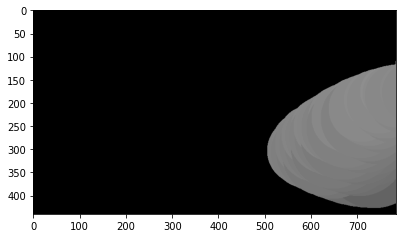

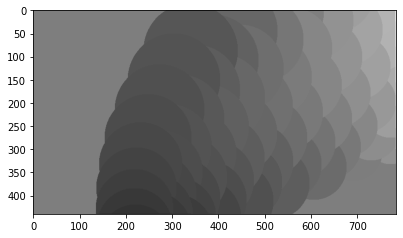

In [70]:
evolution.show_mlp_image()

evolution.show_best_mlp_image()

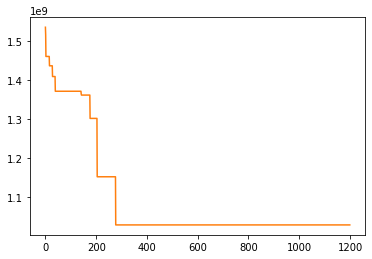

In [71]:
evolution.show_history()

(10, 5)
(100, 5)
[ 2 10 10  5]


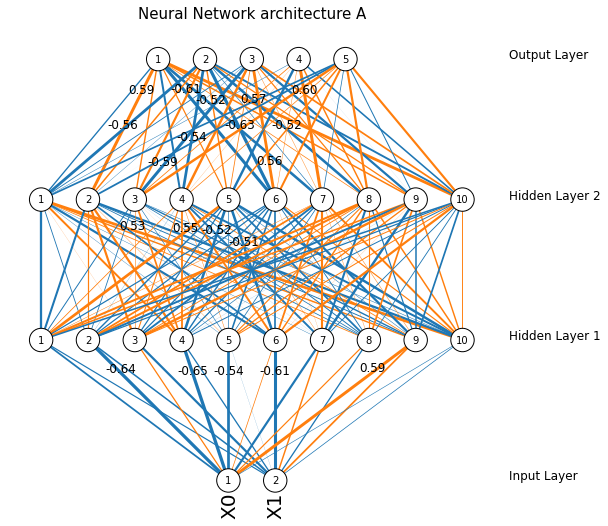

In [72]:

evolution.nn_plot()


self.row_neurons = 10
self.col_neurons = 10


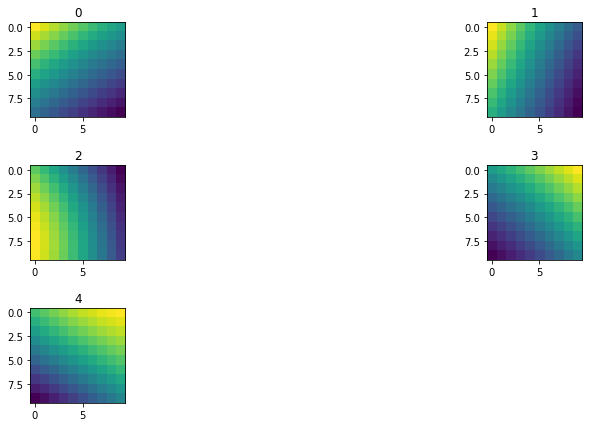

In [49]:

evolution.nn_visualizer()


In [50]:

evolution.create_mlp_image()


(440, 784)


/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:41: RuntimeWarning: invalid value encountered in true_divide
  distances = ((r * cos_alpha + c * sin_alpha) / r_rad) ** 2 \
/usr/local/lib/python3.7/dist-packages/skimage/draw/draw.py:42: RuntimeWarning: invalid value encountered in true_divide
  + ((r * sin_alpha - c * cos_alpha) / c_rad) ** 2


In [40]:
print(evolution.best_img.min())
print(evolution.best_img.max())

7.0
217.0
